<h1 STYLE="padding-left:1em;text-align: center;">Projet 04 : Anticipez les besoins en consommation électrique de bâtiments </h1> 

#  Introduction  
<p STYLE="padding-left:1em;text-align: justify;">Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.
<p STYLE="padding-left:1em;text-align: justify;"> Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire <b> les émissions de CO2 et la consommation totale d’énergie de bâtiments </b> pour lesquels elles n’ont pas encore été mesurées.
<p STYLE="padding-left:1em;text-align: justify;">Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..)
<p STYLE="padding-left:1em;text-align: justify;">Vous cherchez également à évaluer l’intérêt de <b> l’ "ENERGY STAR Score" </b> pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.<br>
<p STYLE="padding-left:1em;text-align: justify;"> <b>Dans cette seconde partie du projet, nous allons tester plusieurs modèles de régressions linéaires afin de prédire les émissions de CO2 et les consommations d'énergie des bâtiments.    

# Sommaire
<a href="#1" STYLE="padding-left:1em;color:black"><b>Etape 1 : Importation des librairies et des fonctions graphiques</b></a><br>
<a href="#2" STYLE="padding-left:1em;color:black"><b>Etape 2 : Importation, observation et préparation des données pour la modélisation</b></a><br>
<a href="#3" STYLE="padding-left:1em;color:black"><b>Etape 3 : Prédiction de la consommation d'énergie et de l'émission de CO2 des bâtiments</b></a><br>
<a href="#3.1" STYLE="padding-left:2em;color:black">3.1 Modèle de prédiction de la consommation d'énergie </a><br>
<a href="#3.1.1" STYLE="padding-left:3em;color:black">3.1.1 Transformation et sélection des variables catégorielles et numériques pertinentes</a><br>
<a href="#3.1.1.a" STYLE="padding-left:4em;color:black">3.1.1.a Variables numériques</a><br>
<a href="#3.1.1.b" STYLE="padding-left:4em;color:black">3.1.1.b Variables catégorielles</a><br>
<a href="#3.1.2" STYLE="padding-left:3em;color:black">3.1.2 Régression linéaire multivariée</a><br>
<a href="#3.1.3" STYLE="padding-left:3em;color:black">3.1.3 Régression linéaire multivariée régularisée, vectorielle et ensemblistes</a><br>
<a href="#3.2" STYLE="padding-left:2em;color:black">3.2 Modèle de prédiction d'émission de CO2 </a><br>
<a href="#3.2.1" STYLE="padding-left:3em;color:black">3.2.1 Transformation et sélection des variables catégorielles et numériques pertinentes</a><br>
<a href="#3.2.2" STYLE="padding-left:3em;color:black">3.2.2 Régression linéaire multivariée</a><br>
<a href="#3.2.3" STYLE="padding-left:3em;color:black">3.2.3 Régression linéaire multivariée régularisée, vectorielle et ensemblistes</a><br>
<a href="#3.2" STYLE="padding-left:2em;color:black">3.3 Influence du score ENERGY STAR pour la prédiction d’émissions CO2</a><br>
<a href="#3.3.1" STYLE="padding-left:3em;color:black">3.3.1 Préparation du jeu de donnée</a><br>
<a href="#3.3.2" STYLE="padding-left:3em;color:black">3.3.2 Transformation et sélection des variables catégorielles et numériques pertinentes</a><br>
<a href="#3.3.3" STYLE="padding-left:3em;color:black">3.3.3 Régression linéaire multivariée régularisée, vectorielle et ensemblistes</a><br>

# <a STYLE="color:black" id="1"> Etape 1 : Importation des librairies et des fonctions graphiques

In [1]:
%matplotlib inline

from ast import literal_eval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler , MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error , median_absolute_error , mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 200)

<p STYLE="padding-left:1em;color:blue;"><b>Configuration générale des différents graphiques <font>

In [2]:
plt.rcdefaults()
font_title = {'color': 'blue','weight': 'bold','size': 12}
font_label = {'size': 10}
font_ticks = 10
font_legend = 8

c = []
[c.append(plt.cm.tab20(i)) for i in range(20)]
    
def config_plt(plot = plt, ax = None, title = 'titre',X_name = None ,Y_name = None,legend = ''):   
    
    if plot == plt :
        plot.title(title,fontdict=font_title)
        plot.xlabel(X_name,fontdict=font_label)
        plot.ylabel(Y_name,fontdict=font_label)
        plot.xticks(fontsize =font_ticks, rotation = rotx)
        plot.yticks(fontsize =font_ticks,rotation = roty)
        if legend is not None:
            plot.legend(title = legend , fontsize =font_legend)
# Sub-plot
    else :
        ax.set_title(title,fontdict=font_title)
        ax.set_xlabel(X_name,fontdict=font_label)
        ax.set_ylabel(Y_name,fontdict=font_label)
        ax.tick_params(axis='x', labelsize=font_ticks)
        ax.tick_params(axis='y', labelsize=font_ticks )
        if legend is not None: 
            ax.legend(title = legend , fontsize =font_legend)

In [3]:
def plot_scatter(DF,x_cols,cols, categorie= None,Nb_cols=2,length=None,width=None,x_lim=None,y_lim =None,title=None,x_name=None,y_name=None,legend=None):
    x_cols = [x_cols] if np.array([x_cols]).size == 1 else x_cols 
    cols = [cols]  if np.array([cols]).size == 1 else cols 
    Nb_var =  1 if np.array([cols]).size == 1 else len(cols)
    Nb_row = int(0.5 + Nb_var/Nb_cols)
    width = 4*Nb_cols
    length = 4*Nb_row
    fig = plt.figure(figsize=(width,length))    
    for i in range(0,Nb_var):
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        if categorie is None : 
            if len(x_cols)==1:
                axes.scatter(DF[x_cols[0]],DF[cols[i]],color = c[0],s=1.75)
            else : 
                axes.scatter(DF[x_cols[i]],DF[cols[i]],color = c[0],s=1.75)
        else :
            k=0
            for cat in DF[categorie].unique():
                DF_frac = DF[DF[categorie] == cat]
                if len(x_cols)==1:
                    axes.scatter(DF_frac[x_cols[0]],DF_frac[cols[i]],color = c[k],s=1.75 ,label = cat)
                else : 
                    axes.scatter(DF_frac[x_cols[i]],DF_frac[cols[i]],color = c[k],s=1.75, label = cat)
                k+=1
            legend = str(cat if label.get(cat) is None else label.get(cat))
            
        axes.set_xlim(x_lim) if x_lim is not None else None    
        axes.set_ylim(y_lim) if y_lim is not None else None
        
        j = 0 if len(x_cols)==1 else i
        title_plt = '' if title is None else [title if len([cols]) == 1 else title[i]]    
        if x_name is None :
            x = str(x_cols[j] if label.get(x_cols[j]) is None else label.get(x_cols[j]))
        else : 
            x = x_name if np.array([x_name]).size == 1 else x_name[j]
        if y_name is None : 
            y = str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            y = y_name if np.array([y_name]).size == 1 else x_name[i]
            
        config_plt(plot = 'None', ax = axes , title = title_plt , X_name = x, Y_name = y , legend = legend)
        fig.tight_layout()
    plt.show() 

def plot_hist(DF, cols, Nb_cols=1 , log ='No', title = None , x_name = None, y_name =None , legend = None ):         
    if np.array([cols]).size == 1:
        Nb_var = 1
    else : 
        Nb_var = int(len(cols))
    Nb_row = int(Nb_var/Nb_cols + 0.5)
    fig = plt.figure(figsize=(4*Nb_cols,4*Nb_row))               
    for i in range(0,Nb_var): 
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        DF_cols = DF[cols[i]]
        bins = np.arange(DF_cols.min(),DF_cols.max(),2)
        if log == 'yes' : 
            DF_cols = np.log(DF_cols)
            bins = np.arange(DF_cols.min(),DF_cols.max(),np.log(1.1))    
        if len(bins) > 100 : 
            bins = 100    
        if title is None :    
            title_plt = 'Distribution :\n ' + str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            title_plt = [title if np.array([cols]).size == 1 else title[i]]
        if x_name is None : 
            x = str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            x = x_name if np.array([x_name]).size == 1 else x_name[i]
        if y_name is None : 
            y = 'Nombre de bâtiments '
        else : 
            y = y_name if np.array([y_name]).size == 1 else x_name[i]
                     
# Tracer des histogrammes
        axes.hist(DF_cols,bins = bins)
        config_plt(plot = 'None', ax = axes , title = title_plt , X_name = x, Y_name = y , legend = legend)
        fig.tight_layout()
    plt.show()
    
def mat_cor(DF , cols = None ,sort_var = None):
    if cols  is None:
        DF_mat_corr = DF.corr()
        fig=plt.figure(figsize=(DF.columns.size/2,4))
    else : 
        DF_mat_corr = DF[cols].corr()
        fig=plt.figure(figsize=(np.array(cols).size/2,4))
    
    if sort_var is not None:
        DF_cols = DF_mat_corr[sort_var].sort_values(ascending = False).index
        DF_mat_corr = DF_mat_corr.loc[DF_cols,DF_cols]
    
    mask = np.zeros_like(DF_mat_corr)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(DF_mat_corr, mask = mask,cmap='coolwarm',annot=True, 
                     annot_kws={"size":8 ,'weight':'bold','color':'black'}) 
    
    title = "Coefficients de corrélation de Pearson"
    config_plt(plot = None , ax = ax , title = title , X_name = None , Y_name = None , legend = None)
    plt.show()

# <a STYLE="color:black" id="2">Etape 2 : Importation, observation et préparation des données pour la modélisation 

In [4]:
label = {'BuildingAge' : 'Age du bâtiment' , 'NumberofBuildings' : 'Nombre de bâtiments',
        'SiteEnergyUse(kBtu)': 'Energie utilisée (kBtu)','TotalGHGEmissions' : 'Total GHG Emissions',
        'NumberofFloors':'Nombre d\'étages','Neighborhood' : 'Quartier','BuildingType':'Type du bâtiment',
        'log_SiteEnergyUse(kBtu)': 'Energie utilisée (kBtu) (log)','log_TotalGHGEmissions' : 'Total GHG Emissions (log)'}

In [5]:
Data = pd.read_csv('P03_Dataset_clean.csv')

In [6]:
print('le jeu de données comporte {} lignes et {} variables'.format(Data.shape[0],Data.shape[1]))
display(Data.sample(5))
print(Data.info())
print('\n')
Data.describe()

le jeu de données comporte 1684 lignes et 20 variables


,BuildingType,Neighborhood,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,ElectricityUse,NaturalGasUse,SteamUseUse,BuildingAge,Cat_LargestPropertyUseType,Cat_SecondLargestPropertyUseType,Cat_ThirdLargestPropertyUseType,dX_center,dY_center,log_SiteEnergyUse(kBtu),log_TotalGHGEmissions
1524,SPS-District K-12,NORTHWEST,1.0,45174.0,0.0,0.0,86.0,1.920455e+06,68.135,1,1,0,60.0,Education,No information,No information,-0.215050,12.041918,14.468072,4.221491
378,NonResidential,DOWNTOWN,10.0,152102.0,25683.5,2155.0,87.0,7.854203e+06,54.755,1,0,0,14.0,Office,Parking,other,-0.409634,-0.729389,15.876559,4.002869
292,NonResidential,DOWNTOWN,12.0,146689.0,0.0,0.0,NaN,1.458600e+07,101.685,1,0,0,31.0,other,No information,No information,1.129033,0.675579,16.495573,4.621880
37,SPS-District K-12,NORTHEAST,2.0,182861.0,0.0,0.0,88.0,6.313273e+06,262.360,1,1,0,66.0,Education,No information,No information,-3.546743,8.476132,15.658165,5.569718
1570,NonResidential,NORTHEAST,3.0,97500.0,0.0,0.0,97.0,3.674895e+06,153.610,1,1,0,92.0,Education,No information,No information,-5.676934,6.425278,15.117035,5.034417


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BuildingType                      1684 non-null   object 
 1   Neighborhood                      1684 non-null   object 
 2   NumberofFloors                    1684 non-null   float64
 3   LargestPropertyUseTypeGFA         1684 non-null   float64
 4   SecondLargestPropertyUseTypeGFA   1684 non-null   float64
 5   ThirdLargestPropertyUseTypeGFA    1684 non-null   float64
 6   ENERGYSTARScore                   1148 non-null   float64
 7   SiteEnergyUse(kBtu)               1684 non-null   float64
 8   TotalGHGEmissions                 1684 non-null   float64
 9   ElectricityUse                    1684 non-null   int64  
 10  NaturalGasUse                     1684 non-null   int64  
 11  SteamUseUse                       1684 non-null   int64  
 12  Buildi

,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,ElectricityUse,NaturalGasUse,SteamUseUse,BuildingAge,dX_center,dY_center,log_SiteEnergyUse(kBtu),log_TotalGHGEmissions
count,1684.000000,1.684000e+03,1684.000000,1684.000000,1148.000000,1.684000e+03,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000
mean,4.122922,9.888670e+04,18526.905967,3026.944655,64.945122,8.504671e+06,186.409920,0.992874,0.714371,0.068884,54.137173,0.070465,1.108527,14.911349,3.947579
std,6.535135,2.759026e+05,52420.064810,17620.750129,28.003628,3.021410e+07,748.283125,0.084139,0.451848,0.253331,32.830606,2.392173,5.342323,1.320897,1.524572
min,1.000000,6.455000e+03,0.000000,0.000000,1.000000,1.697945e+04,0.120000,0.000000,0.000000,0.000000,1.000000,-7.537486,-11.883279,9.739759,-2.120264
25%,1.000000,2.547250e+04,0.000000,0.000000,46.500000,1.230996e+06,20.311250,1.000000,0.000000,0.000000,27.000000,-1.026208,-2.256444,14.023334,3.011174
50%,2.000000,4.346250e+04,0.000000,0.000000,72.500000,2.557883e+06,50.540000,1.000000,1.000000,0.000000,51.000000,0.074942,0.695082,14.754690,3.922765
75%,4.000000,9.195275e+04,12839.625000,0.000000,88.000000,7.000638e+06,141.133750,1.000000,1.000000,0.000000,86.000000,1.060170,4.790543,15.761510,4.949708
max,99.000000,9.320156e+06,686750.000000,459748.000000,100.000000,8.739237e+08,16870.980000,1.000000,1.000000,1.000000,116.000000,7.968546,14.182252,20.588504,9.733350


In [7]:
Data[['ElectricityUse','SteamUseUse','NaturalGasUse']] = Data[['ElectricityUse','SteamUseUse','NaturalGasUse']].astype('object')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BuildingType                      1684 non-null   object 
 1   Neighborhood                      1684 non-null   object 
 2   NumberofFloors                    1684 non-null   float64
 3   LargestPropertyUseTypeGFA         1684 non-null   float64
 4   SecondLargestPropertyUseTypeGFA   1684 non-null   float64
 5   ThirdLargestPropertyUseTypeGFA    1684 non-null   float64
 6   ENERGYSTARScore                   1148 non-null   float64
 7   SiteEnergyUse(kBtu)               1684 non-null   float64
 8   TotalGHGEmissions                 1684 non-null   float64
 9   ElectricityUse                    1684 non-null   object 
 10  NaturalGasUse                     1684 non-null   object 
 11  SteamUseUse                       1684 non-null   object 
 12  Buildi

In [8]:
print(Data['Cat_LargestPropertyUseType'].unique())
print(Data['Cat_SecondLargestPropertyUseType'].unique())
print(Data['Cat_ThirdLargestPropertyUseType'].unique())
print(Data['BuildingType'].unique())
print(Data['Neighborhood'].unique())

['hotel/housing' 'public_building' 'Hobbies' 'other' 'Education' 'Retail'
 'Office' 'distribution/warehouse' 'Health' 'Parking' 'Data Center'
 'Refrigerated Warehouse' 'Manufacturing/Industrial Plant']
['No information' 'Parking' 'Office' 'Hobbies' 'Education'
 'Refrigerated Warehouse' 'distribution/warehouse' 'Retail' 'Data Center'
 'other' 'public_building' 'hotel/housing'
 'Manufacturing/Industrial Plant' 'Health']
['No information' 'Hobbies' 'Data Center' 'Office' 'Retail'
 'distribution/warehouse' 'other' 'Parking' 'Education' 'hotel/housing'
 'Refrigerated Warehouse' 'Manufacturing/Industrial Plant' 'Health']
['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']
['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE']


In [9]:
print(Data[Data['Cat_LargestPropertyUseType'] == 'No information'].shape[0])
print(Data[Data['Cat_SecondLargestPropertyUseType'] == 'No information'].shape[0])
print(Data[Data['Cat_ThirdLargestPropertyUseType'] == 'No information'].shape[0])

0
818
1328


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Nous observons que les  variables <span STYLE="color:gray;" ><i> "Cat_SecondLargestPropertyUseType & Cat_ThirdLargestPropertyUseType </i></span> ont des valeurs renseignées ne contenant aucune information. Ceci doit être pris en compte lors des modélisations 

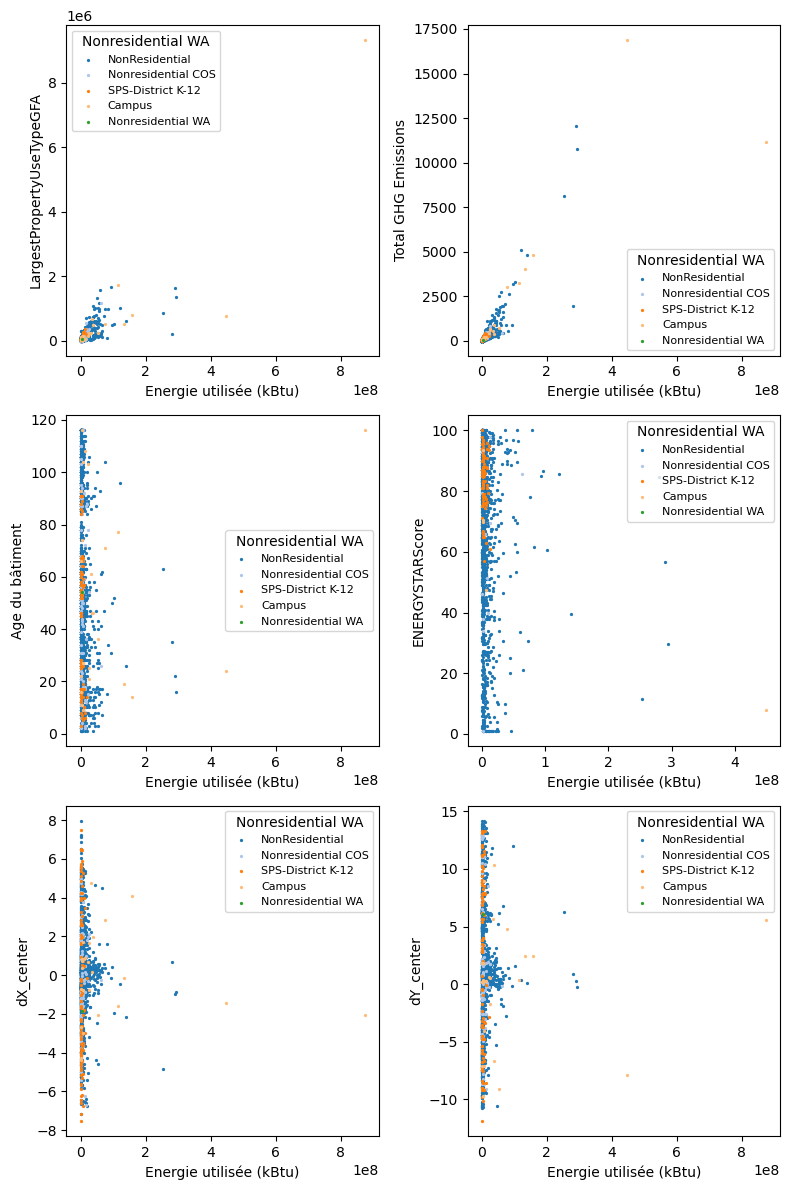

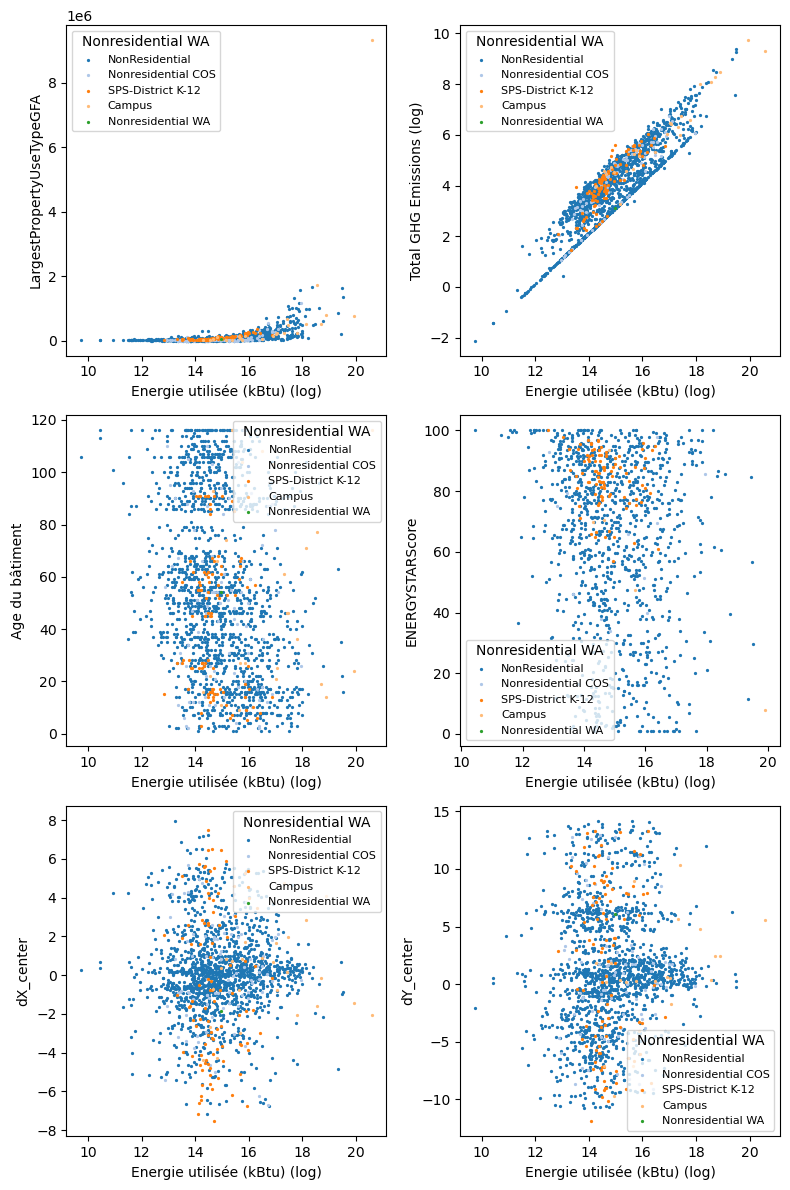

In [10]:
plot_scatter(Data,'SiteEnergyUse(kBtu)',['LargestPropertyUseTypeGFA','TotalGHGEmissions','BuildingAge','ENERGYSTARScore',
                                         'dX_center','dY_center'],categorie='BuildingType')

plot_scatter(Data,'log_SiteEnergyUse(kBtu)',['LargestPropertyUseTypeGFA','log_TotalGHGEmissions','BuildingAge'
                                             ,'ENERGYSTARScore','dX_center','dY_center'],categorie='BuildingType')

<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Un bâtiment de type campus est très supérieur aux autres données au niveau de la variable <span STYLE="color:gray;" ><i> LargestPropertyUseTypeGFA </i></span> qui est fortement corrélée à la variable cible <span STYLE="color:gray;" ><i> SiteEnergyUse(kBtu) </i></span>.Il ne s'agit sans doute pas d'une valeur abérrante mais d'une valeur atypique. Néanmoins,elle peut avoir une incidence au niveau de la modélisation. Nous allons ici la supprimer de nos données sources.

In [11]:
Data.drop(Data[Data['LargestPropertyUseTypeGFA'] > 9e+06].index, axis=0,errors='ignore',inplace=True)
Data.reset_index(drop=True,inplace=True)
Data.describe()

,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,dX_center,dY_center,log_SiteEnergyUse(kBtu),log_TotalGHGEmissions
count,1683.000000,1.683000e+03,1683.000000,1683.000000,1148.000000,1.683000e+03,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000
mean,4.124777,9.340763e+04,18537.914230,3028.743196,64.945122,7.990459e+06,179.901215,54.100416,0.071741,1.105868,14.907976,3.944387
std,6.536634,1.599484e+05,52433.698049,17625.832768,28.003628,2.163091e+07,699.198416,32.805683,2.392312,5.342797,1.314014,1.519389
min,1.000000,6.455000e+03,0.000000,0.000000,1.000000,1.697945e+04,0.120000,1.000000,-7.537486,-11.883279,9.739759,-2.120264
25%,1.000000,2.546500e+04,0.000000,0.000000,46.500000,1.230860e+06,20.292500,27.000000,-1.022379,-2.256941,14.023223,3.010250
50%,2.000000,4.345200e+04,0.000000,0.000000,72.500000,2.556121e+06,50.500000,51.000000,0.078945,0.693684,14.754002,3.921973
75%,4.000000,9.179000e+04,12851.750000,0.000000,88.000000,6.991849e+06,140.785000,86.000000,1.063163,4.788200,15.760256,4.947232
max,99.000000,1.719643e+06,686750.000000,459748.000000,100.000000,4.483853e+08,16870.980000,116.000000,7.968546,14.182252,19.921163,9.733350


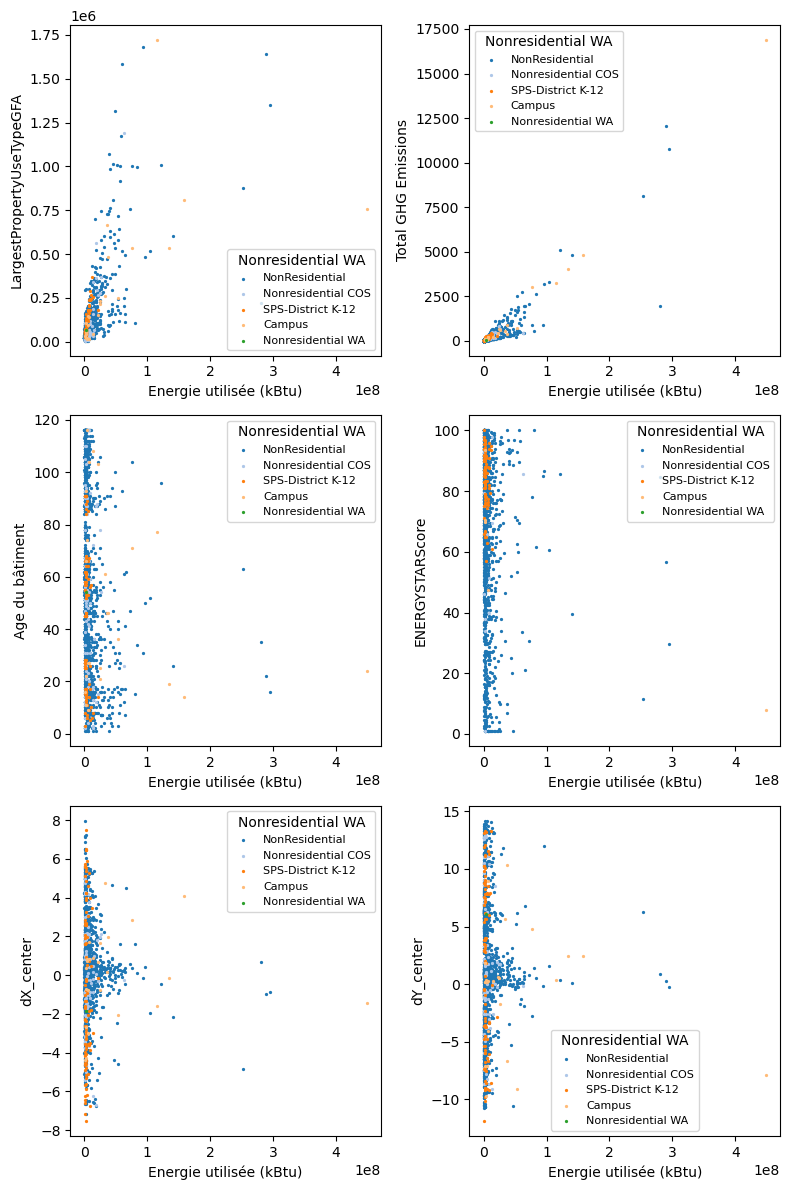

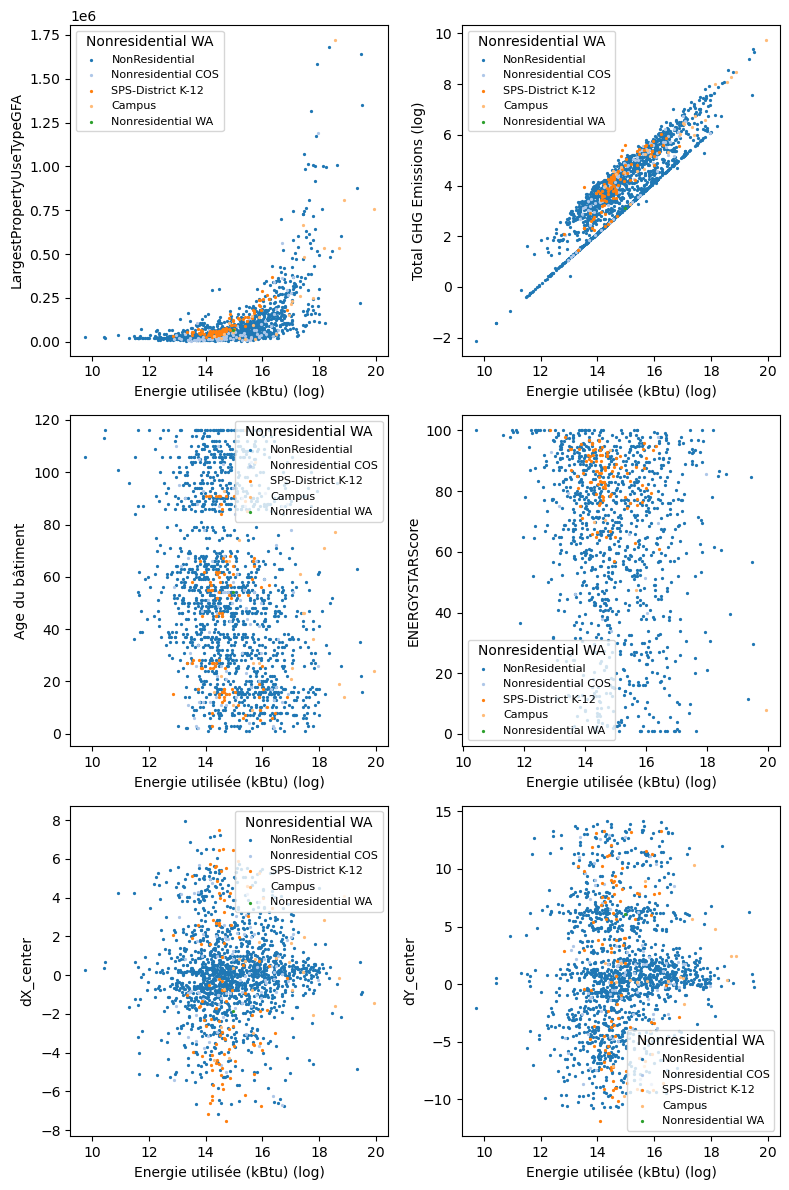

In [12]:
plot_scatter(Data,'SiteEnergyUse(kBtu)',['LargestPropertyUseTypeGFA','TotalGHGEmissions','BuildingAge','ENERGYSTARScore',
                                         'dX_center','dY_center'],categorie='BuildingType')

plot_scatter(Data,'log_SiteEnergyUse(kBtu)',['LargestPropertyUseTypeGFA','log_TotalGHGEmissions','BuildingAge'
                                             ,'ENERGYSTARScore','dX_center','dY_center'],categorie='BuildingType')

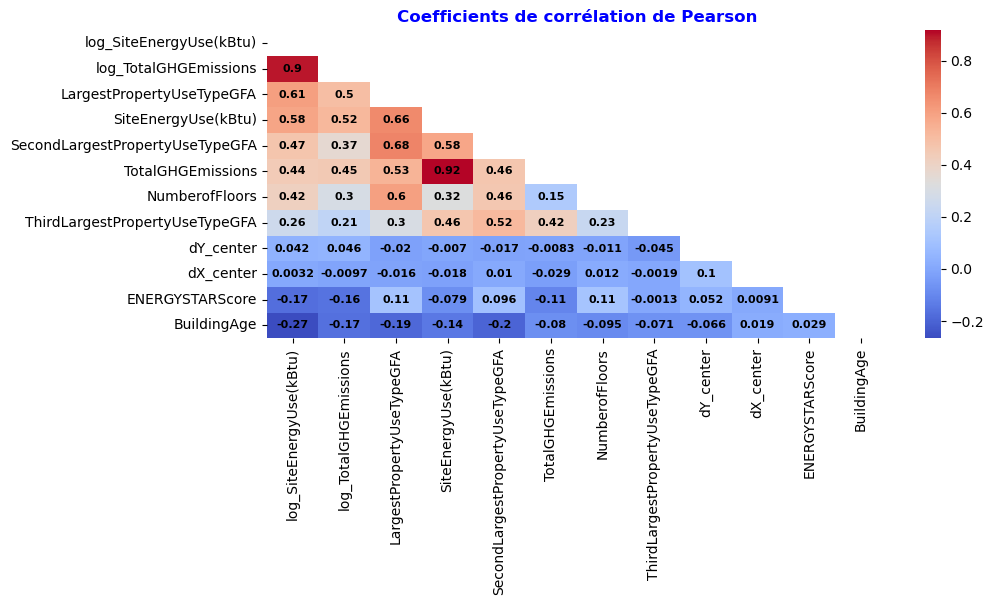

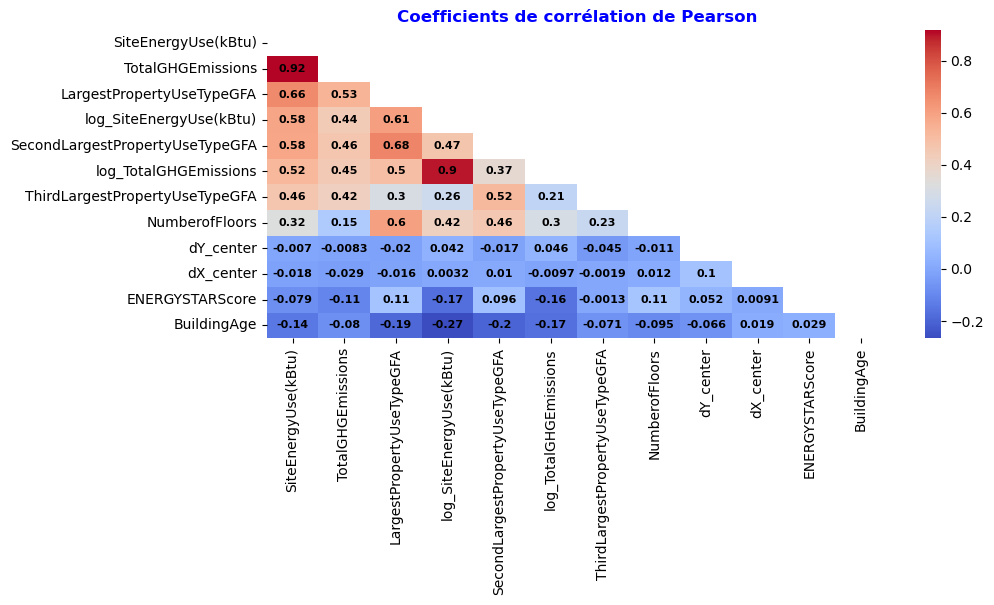

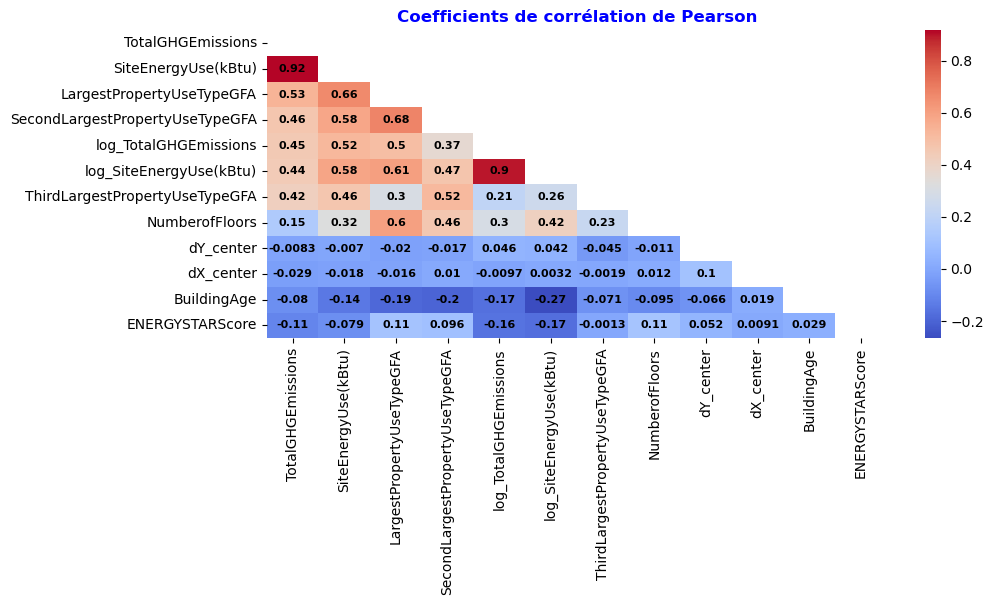

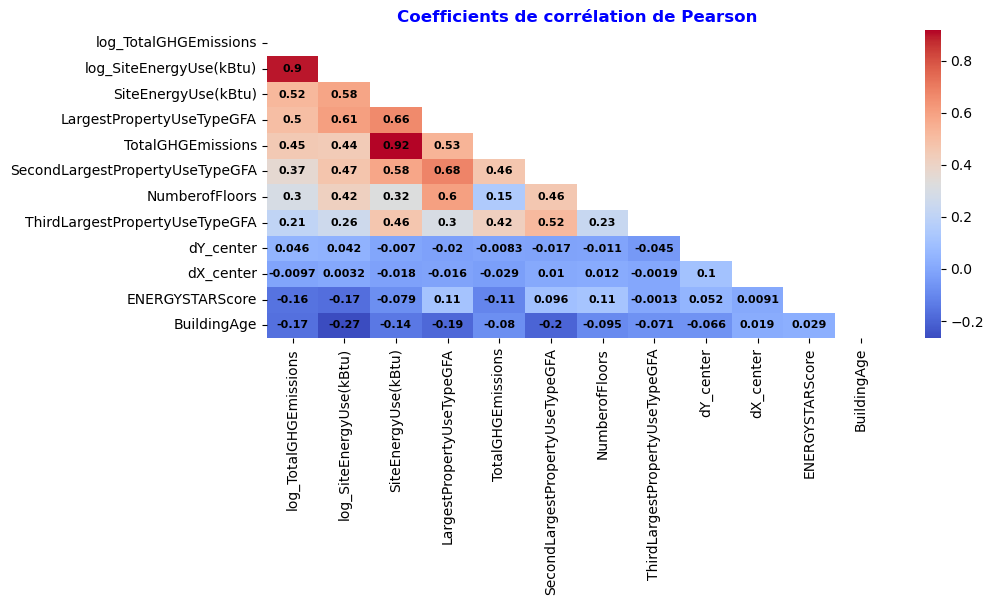

In [13]:
mat_cor(Data,sort_var = 'log_SiteEnergyUse(kBtu)')
mat_cor(Data,sort_var = 'SiteEnergyUse(kBtu)')
mat_cor(Data,sort_var = 'TotalGHGEmissions')
mat_cor(Data,sort_var = 'log_TotalGHGEmissions')

In [14]:
X_num_tot = Data.select_dtypes(include=['int64','float64']).drop(['SiteEnergyUse(kBtu)','log_SiteEnergyUse(kBtu)',
                                                                  'TotalGHGEmissions','log_TotalGHGEmissions','ENERGYSTARScore'],
                                                                 errors='ignore',axis=1)
X_num_tot = X_num_tot.columns
X_cat_tot = Data.select_dtypes(exclude=['int64','float64']).columns
Data_X = pd.concat([Data[X_num_tot],Data[X_cat_tot]], axis=1)
X_cols_tot = list(X_num_tot) + list(X_cat_tot)

Y = pd.DataFrame(Data['SiteEnergyUse(kBtu)'])
Y_log = pd.DataFrame(Data['log_SiteEnergyUse(kBtu)'])
Y_CO2 = pd.DataFrame(Data['TotalGHGEmissions'])
Y_CO2_log = pd.DataFrame(Data['log_TotalGHGEmissions'])

# <a STYLE="color:black" id="3">Etape 3 : Prédiction de la consommation d'énergie et de l'émission de CO2 des bâtiments</a> 
## <a STYLE="color:black" id="3.1">3.1 Modèle de prédiction de la consommation d'énergie : régression linéaire (baseline) </a> 
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Dans cette section, nous créons un modèle baseline pour évaluer les performances de nos futurs modèles et vérifier qu'ils améliore les prédictions. Pour cette baseline, nous utiliserons une régression linéaire multivariée. </b></p> 

## <a STYLE="padding-left:1em;color:black" id="3.1.1">3.1.1 Transformation et sélection des variables catégorielles et numériques pertinentes</a>
<p STYLE="padding-left:1em;color:blue;"><b> Il s'agit de sélectionner les variables ayant une influence sur la prédiction de l'énergie utilisée des différents bâtiments.

In [15]:
def Supp_cols(DF, cols):
    cols = np.array([cols]) if np.array([cols]).size == 1 else cols
    for col in cols:
        DF = DF.drop(col,axis=1,errors='ignore')
    return DF

def cat_transform(DF, cols):
    le=LabelEncoder()
    DF_cat = DF.copy()
    cols = [cols] if np.array([cols]).size == 1 else cols
    for col in cols :
        DF_cat[col] = le.fit_transform(DF_cat[col]) 
    enc = OneHotEncoder()
    DF_cat = enc.fit_transform(DF_cat[cols]).toarray()
    return pd.DataFrame(DF_cat, columns = enc.get_feature_names_out())

def num_transform(DF, cols):
    DF_var = DF.copy()
    Sc=StandardScaler()
    if np.array([cols]).size == 1:
        DF_var[cols] = Sc.fit_transform(pd.DataFrame(DF_var[cols])) 
    else : 
        DF_var[cols] = Sc.fit_transform(DF_var[cols])
    DF_var_clean = DF_var[cols]
    return DF_var_clean

def cols_corr_select(DF, target, seuil = 0) : 
    DF_mat_corr = abs(DF.corr()[target]).sort_values(ascending = False)
    DF_mat_corr = DF_mat_corr[DF_mat_corr>=seuil]
    DF_cols = np.intersect1d(DF_mat_corr.index, X_cols_tot)
    DF_corr = DF_mat_corr[DF_cols].sort_values(ascending = True)
    return DF_cols , DF_corr  

def select_col_pred(DF , target , seuil = 0 , cols_num = None , cols_cat = None) : 
    if cols_num is None : 
        X_var , X_corr = cols_corr_select(DF,target, seuil)
        X_var = num_transform(DF,X_var)
    elif not list(cols_num) :
        X_var = pd.DataFrame()
    else :  
        X_var = num_transform(DF,cols_num)  
    X_var = pd.DataFrame(X_var, columns = [cols_num]) if X_var.ndim == 1 else X_var
    if cols_cat is None :
        X_cat = cat_transform(DF,X_cat_tot)
    elif not list(cols_cat) :
        X_cat = pd.DataFrame()
    else:
        X_cat = cat_transform(DF,cols_cat)
    X_final = pd.concat([X_var,X_cat],axis=1)  
    return X_final 

In [16]:
def predic_linear(DF , target, seuil = 0, cols_num = None , cols_cat = None):
    X = select_col_pred(DF , target , seuil , cols_num = cols_num  , cols_cat = cols_cat )
    nom_modele = 'Régression lineaire : y_log' if 'log' in target else 'Régression lineaire'      
    X_train, X_test, y_train, y_test = train_test_split(X, Data[target], test_size=0.25 ,random_state = 10 )
    
    Lr = LinearRegression()
    Lr.fit(X_train,y_train)
    y_pred = Lr.predict(X_test)
    
    Score_var = np.array([nom_modele,Lr.score(X_train,y_train),Lr.score(X_test,y_test),mean_absolute_error(y_test,y_pred),
                           np.sqrt(mean_squared_error(y_test,y_pred)),median_absolute_error(y_test,y_pred)])
    
    DF_Score = pd.DataFrame([Score_var],columns = ['modèle de régression','score d\'entrainement',
                                                   'score de la prédiction','MAE','RMSE','median abs err'])
    return DF_Score

def score_predict_linear(Data , target ,cols_num = None , cols_cat = None ) : 
    DF_cols , DF_corr = cols_corr_select(Data, target, seuil = 0)
    index_corr = DF_corr.drop('ENERGYSTARScore',errors='ignore')
    k=0
    DF_score = pd.DataFrame()
    cols_supp = pd.DataFrame(['0'],columns=['supp_cols'])
    for i in index_corr :
        try:
            Score = predic_linear(Data, target, seuil = i , cols_num = cols_num, cols_cat = cols_cat)
            Score = pd.concat([cols_supp, Score], axis = 1)
            DF_score = pd.concat([DF_score ,Score], axis = 0)
        except:
            print(f'erreur avec le seuil {i}  : nombre de colonnes nuls ')
        cols_supp['supp_cols']=index_corr.index[k]
        k+=1
    DF_score.reset_index(drop=True , inplace = True)
    return DF_score

In [17]:
def iteration_cols_predict_num(Data , target , cols):
    cols = [cols] if np.array([cols]).size == 1 else cols
    target = [target] if np.array([target]).size == 1 else target    
    for i in cols :
        print(i)
        DF_score_tot = pd.DataFrame()
        for j in range(len(target)) : 
            DF_score = predic_linear(Data , target[j], cols_num = i , cols_cat='')
            DF_score_tot = pd.concat([DF_score_tot,DF_score], axis = 0)
        display(DF_score_tot)

def iteration_cols_predict_cat(Data , target , cols):
    cols = [cols] if np.array([cols]).size == 1 else cols     
    target = [target] if np.array([target]).size == 1 else target   
    for i in cols :
        display(i)
        DF_score_tot = pd.DataFrame()
        for j in range(len(target)) : 
            DF_score = predic_linear(Data ,target[j], cols_num = '' , cols_cat=i)
            DF_score_tot = pd.concat([DF_score_tot,DF_score], axis = 0)
        display(DF_score_tot)

### <a STYLE="color:black;padding-left:1em" id="3.1.1.a">3.1.1.a Variables numériques
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Pour les variables numériques, nous appliquons dans notre étude une standardisation des données afin d'améliorer les prédictions de la variables cible. Nous effectuons ensuite une modélisation simple de chaque variable séparément dans un premier temps afin d'observer leur impact pour modéliser la variable cible puis dans un second temps, nous effectuons une modélisation globale puis nous éliminons une variable une à une en fonction de leur poids dans la matrice de corrélation.

In [18]:
iteration_cols_predict_num(Data,['log_SiteEnergyUse(kBtu)', 'SiteEnergyUse(kBtu)'], X_num_tot )

NumberofFloors


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.17352802745366824,0.17024135941784668,0.8973764097590167,1.1712684039199899,0.7527988020031628
0,Régression lineaire,0.13509056844764378,0.04623044810491195,7080239.141687203,24752804.003414687,3935627.4083968922


LargestPropertyUseTypeGFA


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.3745826628225162,0.3414800140353691,0.8025375682231571,1.0434340776055921,0.6545936705475572
0,Régression lineaire,0.5054864238989725,0.3185569982722052,5419260.526492984,20922686.31791796,1587784.138205342


SecondLargestPropertyUseTypeGFA


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.21465362972726287,0.24151032070407363,0.8568260554789999,1.1198384473640453,0.7405700479326196
0,Régression lineaire,0.279963896233684,0.43922997788157747,6677119.03048031,18979950.284628313,3275819.479110915


ThirdLargestPropertyUseTypeGFA


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.060940028482022957,0.04847720489417817,0.9714035399273688,1.2542674001398093,0.831438603121402
0,Régression lineaire,0.03540895456419435,0.42494291261008066,7517784.09585099,19220211.230134077,5555809.051972917


BuildingAge


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.07532894135241064,0.05661109767857986,0.999407569901862,1.2488949735023374,0.8601785869772858
0,Régression lineaire,0.025025842598706438,0.011162936299797588,8486045.688288737,25203743.10042624,5712584.394971945


dX_center


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.00013372753914697721,-0.0006792528471357695,1.0151631495722817,1.2862576891600763,0.8665756974523706
0,Régression lineaire,0.00026912335955564526,0.00039046727438796225,8532045.216466915,25340657.0061665,6111533.508767983


dY_center


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.0014891746102004833,0.0024654689729363133,1.014914818288542,1.2842350103179025,0.8715565615701575
0,Régression lineaire,0.000370040100584057,-0.0023933187299878256,8539304.080189105,25375917.734965216,6063913.047173088


In [19]:
display(score_predict_linear(Data , 'log_SiteEnergyUse(kBtu)', cols_cat = ''))
display(score_predict_linear(Data , 'SiteEnergyUse(kBtu)', cols_cat = ''))

,supp_cols,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,0,Régression lineaire : y_log,0.4083526074323621,0.3816571097637511,0.7877881062048225,1.0111025878734723,0.6419946045739184
1,dX_center,Régression lineaire : y_log,0.40808128272847166,0.38256101463906966,0.786791333596627,1.0103632935263211,0.6284025592501177
2,dY_center,Régression lineaire : y_log,0.4069558310496656,0.3778125331389406,0.7894882853102932,1.0142410065719147,0.6622202831460751
3,ThirdLargestPropertyUseTypeGFA,Régression lineaire : y_log,0.4045771076224941,0.3790709383790356,0.7886455029826647,1.0132148108694607,0.6489480311168574
4,BuildingAge,Régression lineaire : y_log,0.38350569033679494,0.3511054835202617,0.7908376543544859,1.0357801605178945,0.6211646213899407
5,NumberofFloors,Régression lineaire : y_log,0.38239879574995383,0.342438014776306,0.7938856964514172,1.0426748186168893,0.6241012116813796
6,SecondLargestPropertyUseTypeGFA,Régression lineaire : y_log,0.3745826628225162,0.3414800140353691,0.8025375682231571,1.0434340776055921,0.6545936705475572


,supp_cols,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,0,Régression lineaire,0.5273285223482737,0.3204097670342122,5713019.636110035,20894223.713718057,1959299.217001021
1,dY_center,Régression lineaire,0.526859290967568,0.320995498319265,5696398.572917039,20885217.522866078,1807767.884920025
2,dX_center,Régression lineaire,0.5268207329441259,0.3208049827675421,5697406.893960207,20888147.3117436,1833210.8058455354
3,BuildingAge,Régression lineaire,0.5268039381619388,0.3207844261713345,5700963.379035893,20888463.410912458,1829366.8343907911
4,NumberofFloors,Régression lineaire,0.5158511108242485,0.27481769531562417,5533308.578719712,21583718.848339185,1642842.4952450544
5,ThirdLargestPropertyUseTypeGFA,Régression lineaire,0.5137274307190076,0.37000279433954586,5400628.806341385,20117406.32066331,1605944.9740441665
6,SecondLargestPropertyUseTypeGFA,Régression lineaire,0.5054864238989725,0.3185569982722052,5419260.526492984,20922686.31791796,1587784.138205342


<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> A la suite de ces modélisations simples, nous observons des résultats similaires entre les scores des différentes variables, ne nous permettant d'en éliminer pour la régression linéaire multivariée.      

In [20]:
Cols_best_num_log = X_num_tot.drop([],errors='ignore')
Cols_best_num = X_num_tot.drop(['dX_center','dY_center','BuildingAge','NumberofFloors',
                                'ThirdLargestPropertyUseTypeGFA'],errors='ignore')

### <a STYLE="color:black;padding-left:1em" id="3.1.1.b">3.1.1.b Variables catégorielles
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Pour les variables catégorielles, nous devons appliquer un encodage des données (LabelEncoder + OneHotEncoder) afin de pouvoir utiliser ces données pour les prédictions de la variables cible. Nous effectuons ensuite une modélisation simple de chaque variable séparément afin d'observer leur impact pour modéliser la variable cible.

In [21]:
iteration_cols_predict_cat(Data,['log_SiteEnergyUse(kBtu)', 'SiteEnergyUse(kBtu)'], X_cat_tot )

'BuildingType'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.016350093690889134,-8.477960386560353e+21,5770124445.811152,118393055124.60016,0.8874331941136369
0,Régression lineaire,0.014812953143360508,-1.8512280028636737e+22,1.6807053546604438e+17,3.4485190674118354e+18,5950173.0625


'Neighborhood'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.10090099706440225,0.04236470045033669,0.9759340695942542,1.2582896063857687,0.75429949779571
0,Régression lineaire,0.037792677264264274,-0.00872268777383245,8247787.5077556055,25455906.699216194,4114693.5


'ElectricityUse'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.0011379630126976403,-0.00510389570057046,1.0185692649040596,1.2890982365199621,0.8712448278091944
0,Régression lineaire,0.00033105187228421595,-0.0008766547329759344,8534562.91784563,25356713.042981647,6136647.981457949


'NaturalGasUse'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.01886778401243827,0.016780694123125994,1.0167545676845338,1.2749869361523285,0.8566891131564134
0,Régression lineaire,0.003170322509704393,0.004378525477121142,8482488.989223132,25290056.74128172,5776618.651496692


'SteamUseUse'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.061413933693094225,0.043196274629806686,0.9826440952552838,1.257743162242981,0.8412400226949188
0,Régression lineaire,0.04471567010991473,-0.0006516040720017102,8224244.806679628,25353862.10934075,5151246.669649581


'Cat_LargestPropertyUseType'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.20629125540409787,0.13174407949015665,0.9300242097503122,1.198131297274308,0.7883163993960771
0,Régression lineaire,0.3067368191307662,-0.06893095277192263,7935207.667791235,26204598.055935133,4297266.0625


'Cat_SecondLargestPropertyUseType'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.11535003887320117,-1.3291155236679337e+24,102172901404.12123,1482388036490.6882,0.7554082203759567
0,Régression lineaire,0.039841662373908515,-1.9430538340253765e+23,7.700499864475476e+17,1.117236441092074e+19,4621935.65625


'Cat_ThirdLargestPropertyUseType'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.06700797793584212,0.04941261783749529,0.9731236864617343,1.2536507325955173,0.8258473823368888
0,Régression lineaire,0.03229315334726268,-0.010604355109783636,8379571.717969382,25479638.31129665,5686969.75


In [22]:
Cols_best_cat_log = X_cat_tot.drop(['Cat_SecondLargestPropertyUseType','Cat_ThirdLargestPropertyUseType','BuildingType'],errors='ignore')
Cols_best_cat = X_cat_tot.drop(['Cat_SecondLargestPropertyUseType','Cat_ThirdLargestPropertyUseTypeb','BuildingType'],errors='ignore')

### <a STYLE="color:black;padding-left:1em" id="3.1.2">3.1.2 Régression linéaire multivariée

In [23]:
LR_score_log = predic_linear(Data ,'log_SiteEnergyUse(kBtu)', cols_num = Cols_best_num_log , cols_cat = Cols_best_cat_log)
LR_score = predic_linear(Data ,'SiteEnergyUse(kBtu)', cols_num = Cols_best_num , cols_cat = Cols_best_cat)
LR_score_tot = pd.concat([LR_score_log,LR_score], axis = 0)
display(LR_score_tot) 

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.5650186663592283,0.4976135394985406,0.718958854323052,0.9113800115975468,0.5760520519117591
0,Régression lineaire,0.693681993226585,0.30044423402088416,5692378.9982636,21198925.389919814,2500115.74613408


<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> La transformation en échelle logarithmique de la variable cible permet d'améliorer considérablement les différents scores de la régression linéaire multivariée 

### <a STYLE="color:black;padding-left:1em;text-align: justify;" id="3.1.3">3.1.3 Régression linéaire multivariée régularisée, vectorielle et ensemblistes</a>
<p STYLE="padding-left:1em;color:blue;"><b> Dans cette section, nous allons tester plusieurs modèles de régression linéaire et comparer leurs performances entre eux et avec la baseline afin de sélectionner les modèles offrants les meilleurs prédictions </b> </p> 

In [24]:
X_final_log = pd.concat([Data[list(Cols_best_num_log)+list(Cols_best_cat_log)],Data['log_SiteEnergyUse(kBtu)']],axis=1)

In [25]:
modele_grid = {
    'Linear_R' : LinearRegression(),
    'grid_Ridge' : Ridge(),
    'grid_Lasso' : Lasso(),
    'grid_elastic_net' : ElasticNet(),
    'grid_SVR': SVR(),
    'grid_RFT' : RandomForestRegressor(),
    'grid_XGB' : GradientBoostingRegressor() }

def algo_predict( modele,Data,target,x_cols_num = None, x_cols_cat= None ):
    if (x_cols_num is None) & (x_cols_cat is None) : 
        X_model_pred = Data[Data.columns.drop(target)]
        y = Data[target]
    else :
        X_model_pred = select_col_pred(Data , target , seuil = 0 ,cols_num = x_cols_num , cols_cat = x_cols_cat)
        y = Data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X_model_pred, y, test_size=0.25 ,random_state = 10 )
    
    DF_Score_final = pd.DataFrame()
    DF_param_model_final = pd.DataFrame()
    DF_test_pred_final= pd.DataFrame()
    k=0
    for nom_algo, algo in modele.items():
        if nom_algo =='Linear_R' :
            parametres = {}
        elif (nom_algo =='grid_Ridge') | (nom_algo == 'grid_Lasso') |(nom_algo =='grid_elastic_net'): 
            alphas = np.logspace(-4, 4, 100)
            parametres = {'tol' : [0.1,0.01,0.001], "alpha": alphas } 
        elif nom_algo == 'grid_RFT':
            parametres = {'n_estimators':[10,50,100,300,500,1000],'max_features':['auto','sqrt'], 'max_depth': [1 , 3 , 5, 7, 10, 15]}
        elif nom_algo == 'grid_SVR':
            parametres = {'kernel' : ['linear','rbf'],'gamma' : np.logspace(-4, 0, 5),
                          'epsilon':[0.001, 0.01, 0.1, 1 , 2 , 10],'C' : [0.001, 0.01, 0.1,1,2,5,10,20,50]}    
        elif nom_algo == 'grid_XGB': 
            parametres = {'n_estimators' : [10,20,50,100,500,1000],'max_depth': [1 , 3 , 5, 7, 10, 15]}

        print('Algorithme: ',algo)
        nom_algo = GridSearchCV(estimator = algo,param_grid = parametres,cv = 5, verbose=False, n_jobs = -1)
        nom_algo.fit(X_train, y_train)
        print("le paramètre optimal est {} avec un score de {:.2f}".format(nom_algo.best_params_, nom_algo.best_score_))
        nom_algo.best_estimator_        
        y_pred = nom_algo.predict(X_test)
        Param_model = np.array([str(algo).replace('()',''), nom_algo.best_params_,])
        
        DF_param_model = pd.DataFrame([Param_model],index = [k],columns = ['modèle de régression','Paramètre du modèle'])
        DF_param_model_final = pd.concat([DF_param_model_final, DF_param_model])
        
        y_test_pred = np.array( [str(target) , str(algo).replace('()',' '), y_test.values, y_pred ])
        DF_test_pred = pd.DataFrame([y_test_pred],index = [k],columns = ['Variable prédite','modèle de régression','y_test','y_pred'])
        DF_test_pred_final = pd.concat([DF_test_pred_final,DF_test_pred])
                                 
        Score = np.array( [str(target),str(algo).replace('()',' '),nom_algo.score(X_train,y_train),nom_algo.score(X_test,y_test),
                         mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),
                         median_absolute_error(y_test,y_pred)])
        DF_Score = pd.DataFrame([Score],index = [k],columns = ['Variable prédite','modèle de régression','score d\'entrainement','score de la prédiction',
                                                   'MAE','RMSE','median abs err'])
        DF_Score_final = pd.concat([DF_Score_final, DF_Score ])
        k+=1
    
    cols_float = ['score d\'entrainement','score de la prédiction','MAE','RMSE','median abs err']    
    DF_Score_final[cols_float] = DF_Score_final[cols_float].astype('float64')
    
    return DF_Score_final , DF_param_model_final , DF_test_pred_final

In [26]:
def plot_score(DF , x_cols , y_cols , y_lim = None): 
    fig = plt.figure(figsize=(8, 4))
    axes1 = fig.add_subplot(1,2,1)
    axes2 = fig.add_subplot(1,2,2)
    y_min , y_max = 1e9 , 0
    for i in y_cols :
        if 'score' in i :
            axes2.plot(DF['modèle de régression'],DF[i], label=i , linestyle = '--')
            axes2.tick_params(axis='x',rotation = 90)
            config_plt(plot = 'None', ax = axes2 , title = 'scores', Y_name ='Score')
            axes2.set_ylim([0,1])   
        else : 
            axes1.plot(DF['modèle de régression'],DF[i], label=i , linestyle = '-')
            axes1.tick_params(axis='x',rotation = 90)
            config_plt(plot = 'None', ax = axes1 , title = 'Métriques', Y_name ='Score')
            y_max = max(y_max , DF[i].max())
            y_min = min(y_min , DF[i].min())
            axes1.set_ylim([y_min*0.95,y_max*1.05]) if y_lim is None else axes1.set_ylim(y_lim)
        axes1.grid()
        axes2.grid()
    plt.gca() 
    fig.tight_layout()
    plt.show()  

def plot_true_pred(DF):
    Nb_cols , Nb_var = 2 , DF.shape[0]
    Nb_row = int(0.5 + Nb_var/Nb_cols)
    width,length = 4*Nb_cols , 4*Nb_row 
    fig = plt.figure(figsize=(width,length)) 
    for i in range(Nb_var):  
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        axes.scatter(DF.iloc[i,2], DF.iloc[i,3])
        X_plot = [DF.iloc[i,2].min(), DF.iloc[i,3].max()]
        axes.plot(X_plot, X_plot, color='r')
        title_plt= f"Modèle : {DF.iloc[i,1]}\n Valeurs prédites VS valeurs réélles :\nVariable {DF.iloc[i,0]}"
        config_plt(plot = 'None', ax = axes , title = title_plt , X_name = "Valeurs réélles", Y_name = "Valeurs prédites", legend= None)
    fig.tight_layout()
    plt.show()

In [27]:
Score_cols = ['score d\'entrainement','score de la prédiction','MAE','RMSE','median abs err'] 

Variable cible log_SiteEnergyUse(kBtu)
Algorithme:  LinearRegression()
le paramètre optimal est {} avec un score de 0.41
Algorithme:  Ridge()
le paramètre optimal est {'alpha': 21.544346900318867, 'tol': 0.1} avec un score de 0.52
Algorithme:  Lasso()
le paramètre optimal est {'alpha': 0.007220809018385471, 'tol': 0.001} avec un score de 0.52
Algorithme:  ElasticNet()
le paramètre optimal est {'alpha': 0.008697490026177835, 'tol': 0.001} avec un score de 0.52
Algorithme:  SVR()
le paramètre optimal est {'C': 50, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} avec un score de 0.67
Algorithme:  RandomForestRegressor()
le paramètre optimal est {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 1000} avec un score de 0.71
Algorithme:  GradientBoostingRegressor()
le paramètre optimal est {'max_depth': 3, 'n_estimators': 100} avec un score de 0.72


,Variable prédite,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,log_SiteEnergyUse(kBtu),LinearRegression,0.565019,0.497614,0.718959,0.911380,0.576052
1,log_SiteEnergyUse(kBtu),Ridge,0.554067,0.490739,0.722888,0.917594,0.611416
2,log_SiteEnergyUse(kBtu),Lasso,0.547626,0.491307,0.720441,0.917083,0.619614
3,log_SiteEnergyUse(kBtu),ElasticNet,0.551079,0.489793,0.721633,0.918446,0.622413
4,log_SiteEnergyUse(kBtu),SVR,0.753399,0.575763,0.606454,0.837500,0.463257
5,log_SiteEnergyUse(kBtu),RandomForestRegressor,0.957199,0.658914,0.561294,0.750952,0.423597
6,log_SiteEnergyUse(kBtu),GradientBoostingRegressor,0.818724,0.666974,0.554027,0.742026,0.411511


,modèle de régression,Paramètre du modèle
0,LinearRegression,{}
1,Ridge,"{'alpha': 21.544346900318867, 'tol': 0.1}"
2,Lasso,"{'alpha': 0.007220809018385471, 'tol': 0.001}"
3,ElasticNet,"{'alpha': 0.008697490026177835, 'tol': 0.001}"
4,SVR,"{'C': 50, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}"
5,RandomForestRegressor,"{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 1000}"
6,GradientBoostingRegressor,"{'max_depth': 3, 'n_estimators': 100}"


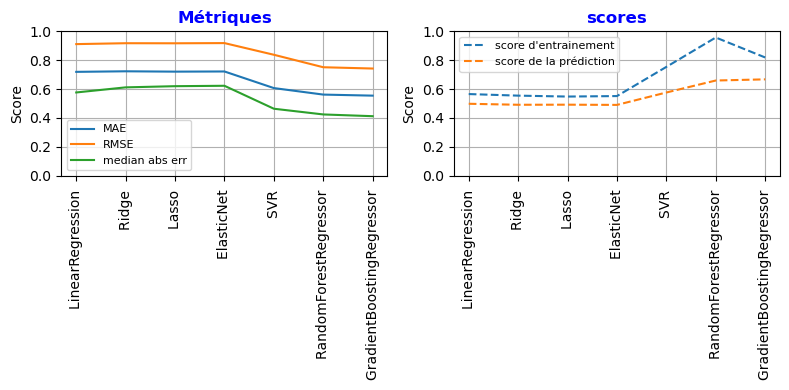

In [28]:
print('Variable cible', Y_log.columns[0])
DF_score_log , Param_model_log, DF_test_pred_log = algo_predict(modele_grid,Data, 'log_SiteEnergyUse(kBtu)' ,Cols_best_num_log ,Cols_best_cat_log)
display(DF_score_log , Param_model_log)
plot_score(DF_score_log , 'modèle de régression' ,Score_cols , y_lim =[0,1])

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Sur les 7 modèles testés, les algorithmes XGBoost et RandomForestRegressor offrent les meilleurs performances sur la qualité des prédictions

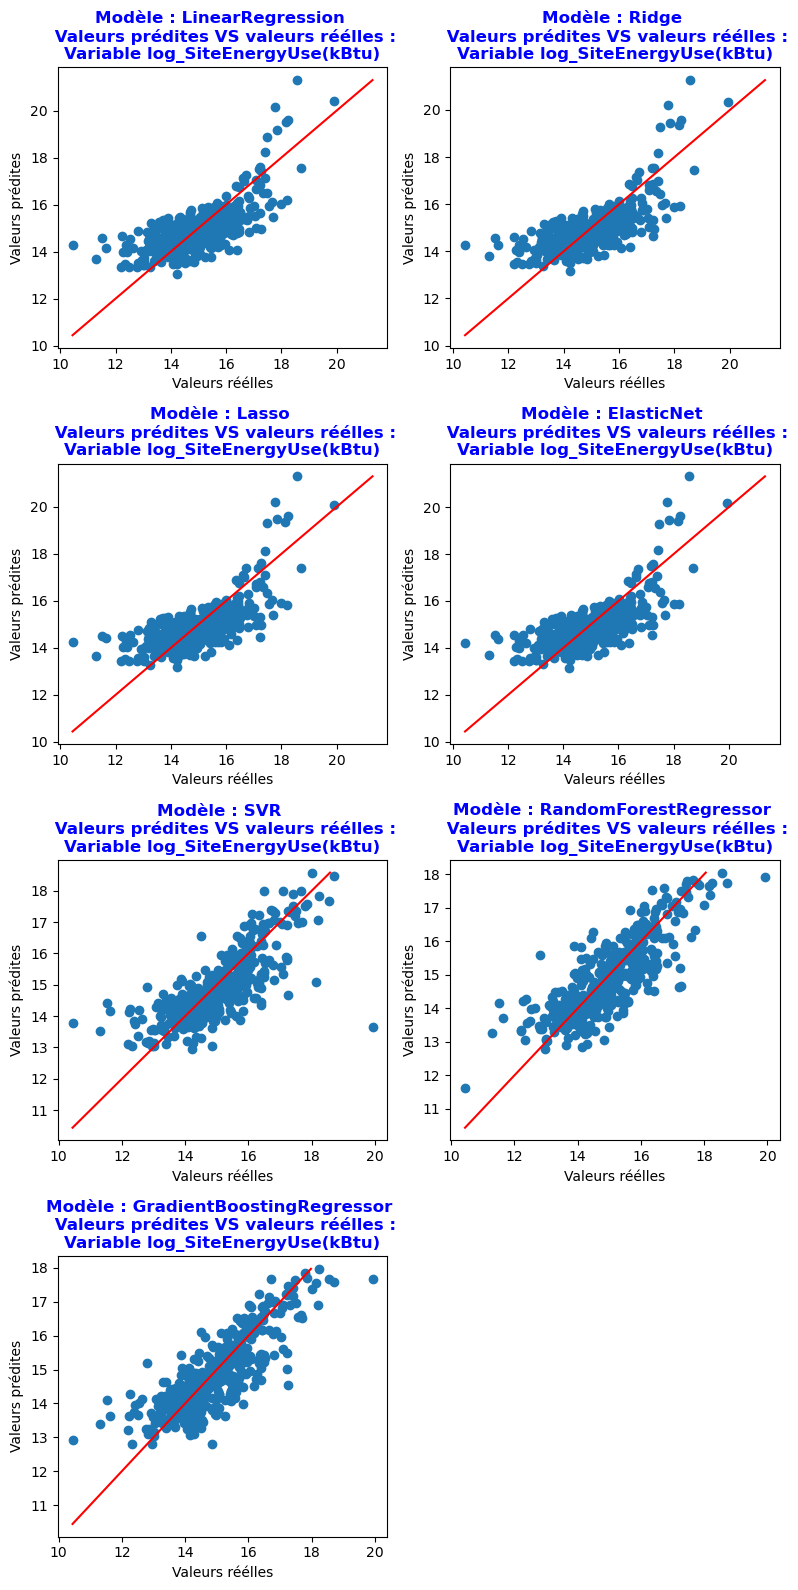

In [29]:
plot_true_pred(DF_test_pred_log)

Variable cible SiteEnergyUse(kBtu)
Algorithme:  LinearRegression()
le paramètre optimal est {} avec un score de 0.44
Algorithme:  Ridge()
le paramètre optimal est {'alpha': 4.862601580065354, 'tol': 0.1} avec un score de 0.60
Algorithme:  Lasso()
le paramètre optimal est {'alpha': 10000.0, 'tol': 0.001} avec un score de 0.45
Algorithme:  ElasticNet()
le paramètre optimal est {'alpha': 0.010476157527896652, 'tol': 0.1} avec un score de 0.60
Algorithme:  SVR()
le paramètre optimal est {'C': 50, 'epsilon': 0.001, 'gamma': 0.0001, 'kernel': 'linear'} avec un score de -0.09
Algorithme:  RandomForestRegressor()
le paramètre optimal est {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100} avec un score de 0.67
Algorithme:  GradientBoostingRegressor()
le paramètre optimal est {'max_depth': 3, 'n_estimators': 20} avec un score de 0.55


,Variable prédite,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,SiteEnergyUse(kBtu),LinearRegression,0.693682,0.300444,5.692379e+06,2.119893e+07,2.500116e+06
1,SiteEnergyUse(kBtu),Ridge,0.649692,0.375729,5.504713e+06,2.002577e+07,2.407866e+06
2,SiteEnergyUse(kBtu),Lasso,0.692768,0.312789,5.558517e+06,2.101105e+07,2.368187e+06
3,SiteEnergyUse(kBtu),ElasticNet,0.640496,0.379137,5.470203e+06,1.997104e+07,2.385213e+06
4,SiteEnergyUse(kBtu),SVR,-0.069756,-0.043858,6.679550e+06,2.589545e+07,1.701629e+06
5,SiteEnergyUse(kBtu),RandomForestRegressor,0.933232,0.356188,4.602547e+06,2.033678e+07,1.763995e+06
6,SiteEnergyUse(kBtu),GradientBoostingRegressor,0.881846,0.289153,5.168166e+06,2.136932e+07,2.309742e+06


,modèle de régression,Paramètre du modèle
0,LinearRegression,{}
1,Ridge,"{'alpha': 4.862601580065354, 'tol': 0.1}"
2,Lasso,"{'alpha': 10000.0, 'tol': 0.001}"
3,ElasticNet,"{'alpha': 0.010476157527896652, 'tol': 0.1}"
4,SVR,"{'C': 50, 'epsilon': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}"
5,RandomForestRegressor,"{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}"
6,GradientBoostingRegressor,"{'max_depth': 3, 'n_estimators': 20}"


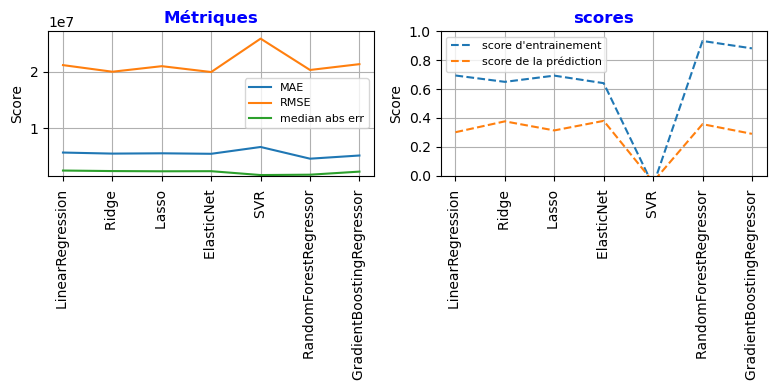

In [30]:
print('Variable cible', Y.columns[0])
DF_score , Param_model , DF_test_pred = algo_predict(modele_grid,Data, 'SiteEnergyUse(kBtu)' ,Cols_best_num ,Cols_best_cat)
display(DF_score , Param_model)
plot_score(DF_score,'modèle de régression' ,Score_cols)

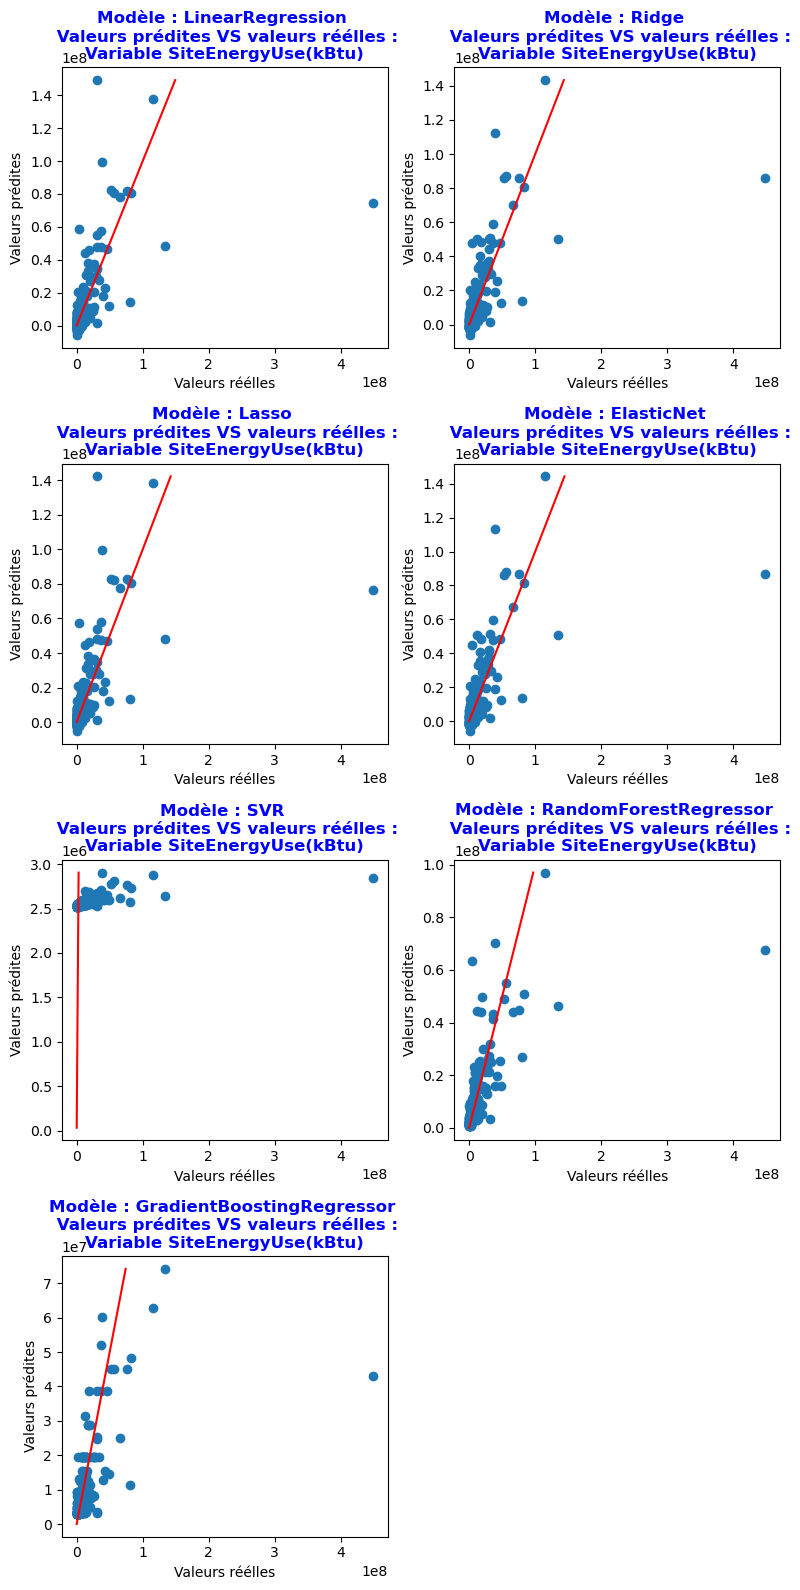

In [31]:
plot_true_pred(DF_test_pred)

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Nous observons que la mise echelle logarithmique de la variable cible <span STYLE="color:gray;" ><i> SiteEnergyUse(kBtu) </i></span> permet d'obtenir de meilleurs performances pour la prédiction de la consommation d'énergie des bâtiments</b> 

## <a STYLE="color:black" id="3.2">3.2 Modèle de prédiction d'émission de CO2 </a> 
## <a STYLE="padding-left:1em;color:black;text-align: justify;" id="3.2.1">3.2.1 Transformation et sélection des variables catégorielles et numériques pertinentes</a>
<p STYLE="padding-left:1em;color:blue;"><b> Il s'agit de sélectionner les variables ayant une influence sur la prédiction des emissions de CO2 des différents bâtiments 

In [32]:
iteration_cols_predict_num(Data,['log_TotalGHGEmissions','TotalGHGEmissions'], X_num_tot )

NumberofFloors


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.08840056276024799,0.085771643186071,1.1132952392895652,1.4376303974247775,0.9327444625323364
0,Régression lineaire,0.03095111618233848,0.007841559518850905,199.67324163322922,878.140775132708,118.41301597283349


LargestPropertyUseTypeGFA


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.2521682953487183,0.24123700502581658,1.017149805502717,1.3097034578777267,0.7989970145904732
0,Régression lineaire,0.35805393539979335,0.17456638641954125,180.56469745266247,800.9671466305323,55.367649730511424


SecondLargestPropertyUseTypeGFA


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.1220495393273906,0.16568983090583467,1.076494197738963,1.3733577152195404,0.8879283838395375
0,Régression lineaire,0.15546172674023173,0.2935925400079067,198.40674341534645,740.9710942689065,84.02184519359324


ThirdLargestPropertyUseTypeGFA


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.032710308141016164,0.0597876163516764,1.135582498754651,1.4579172905067967,0.9671348501207344
0,Régression lineaire,0.0053220701444171015,0.16654130360325536,203.00159918013128,804.8513353827234,137.7943731511365


BuildingAge


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.030705724799818257,0.019599311308891698,1.1669850816057852,1.4887497683529287,0.9734240998418491
0,Régression lineaire,0.0073449106747751625,0.004948595157091118,215.56992831564344,879.4200974130981,139.40753509444497


dX_center


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,1.9890761759566722e-05,-0.0012154189441082597,1.173121939815212,1.5044704698070597,1.0062472732123733
0,Régression lineaire,0.0009256733005043039,0.000677664850022075,213.82479009808694,881.3053870920055,142.32064228060545


dY_center


,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.0022942541528627736,3.5196704211593044e-05,1.1782910190527534,1.5035305610759833,0.9929275489051248
0,Régression lineaire,0.0005193435914717659,-0.002703134472823887,214.03879587348646,882.7948969379273,145.61208934189878


In [33]:
display(score_predict_linear(Data , 'log_TotalGHGEmissions', cols_cat = ''))
display(score_predict_linear(Data , 'TotalGHGEmissions', cols_cat = ''))

,supp_cols,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,0,Régression lineaire : y_log,0.2623253122188034,0.25543470105941046,1.0150088637698187,1.297392248835715,0.8048090697787762
1,dX_center,Régression lineaire : y_log,0.2623230413413825,0.25537652186373816,1.0150670239155024,1.2974429359703266,0.8077453165345028
2,dY_center,Régression lineaire : y_log,0.2600928820497753,0.2507548963368855,1.014581674134069,1.3014631019251246,0.7995576454100002
3,BuildingAge,Régression lineaire : y_log,0.25531670147357854,0.24259000111467288,1.0120821961984767,1.3085352312223124,0.7853014247159962
4,ThirdLargestPropertyUseTypeGFA,Régression lineaire : y_log,0.25376817793525275,0.23992996212689044,1.0187964777145773,1.3108310181619567,0.7998256091288303
5,NumberofFloors,Régression lineaire : y_log,0.2532035923664506,0.24272389295854158,1.0181441338599353,1.3084195673555166,0.7985191173374444
6,SecondLargestPropertyUseTypeGFA,Régression lineaire : y_log,0.2521682953487183,0.24123700502581658,1.017149805502717,1.3097034578777267,0.7989970145904732


,supp_cols,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,0,Régression lineaire,0.4323080666727944,0.07477087629311963,207.62669599279627,848.0047308574692,71.6077416904752
1,dY_center,Régression lineaire,0.4315056580524277,0.07608782127349989,206.8079194580047,847.4010029673793,67.88101793822719
2,dX_center,Régression lineaire,0.4311829058801431,0.07548220986569198,206.19224520672802,847.6786871756905,69.0264045861758
3,BuildingAge,Régression lineaire,0.42818819166031685,0.07488516493673081,205.6516639990246,847.9523544778854,65.79264347833366
4,NumberofFloors,Régression lineaire,0.3694520314342761,-0.049304167988862835,189.15810493014564,903.0760541219698,58.43864139068529
5,ThirdLargestPropertyUseTypeGFA,Régression lineaire,0.3581439406963598,0.1804901366791576,180.57088639741943,798.0878886121833,55.38625460541871
6,SecondLargestPropertyUseTypeGFA,Régression lineaire,0.35805393539979335,0.17456638641954125,180.56469745266247,800.9671466305323,55.367649730511424


In [34]:
Cols_CO2_best_num_log = X_num_tot.drop([],errors='ignore')
Cols_CO2_best_num = X_num_tot.drop(['dX_center','dY_center','BuildingAge','NumberofFloors',
                                'ThirdLargestPropertyUseTypeGFA'],errors='ignore')

In [35]:
iteration_cols_predict_cat(Data,['log_TotalGHGEmissions','TotalGHGEmissions'], X_cat_tot)

'BuildingType'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.02012288652067795,-7.573598238025e+22,20166474740.436646,413781466641.18475,0.9838951962507845
0,Régression lineaire,0.011083724983504295,-3.45906077585179e+21,2527037438937.457,51850473182509.984,141.37


'Neighborhood'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.06407218265591663,0.018175814525397627,1.1686090688408244,1.489830174472959,0.9897378667116303
0,Régression lineaire,0.03169311631535121,-0.01083201069557882,206.69820665083134,886.3660660627957,112.205


'ElectricityUse'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.0001311644506707399,-0.003867279130620238,1.1748386050996897,1.5064615533308847,1.0059950499594392
0,Régression lineaire,2.3634091031676796e-05,-0.000178151104136548,213.66936956056057,881.6826796693265,144.15588986432562


'NaturalGasUse'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.18184570957173019,0.15879720930287655,1.0800539720723497,1.3790190177717843,0.8815846966165966
0,Régression lineaire,0.008652552839851224,0.006425156738068538,206.84509796837366,878.7673673128958,136.17218853362732


'SteamUseUse'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.09577856604291912,0.0691315158871948,1.1198448382034512,1.4506547571452697,0.9278546271890784
0,Régression lineaire,0.06515668254864493,-0.004407423892102802,202.69002632282957,883.54481941218,107.20870307167232


'Cat_LargestPropertyUseType'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.16609790182982342,0.09821113917704105,1.1209406385831016,1.4278163024594284,0.953207569076802
0,Régression lineaire,0.2852031464033973,-0.038054055502102724,195.657945368171,898.2218439261629,98.87


'Cat_SecondLargestPropertyUseType'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.05460984591418594,-2.032365135409896e+24,147738809802.1092,2143486591518.8809,1.0142853438501591
0,Régression lineaire,0.016801693100195414,-4.2157648288170813e+23,39453509478198.08,572416067710105.2,118.025


'Cat_ThirdLargestPropertyUseType'

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.033274078330707835,0.025304973784079476,1.1424668419232928,1.484411389918652,0.9272545712507845
0,Régression lineaire,0.020816468761006623,-0.013787826450201823,213.19878859857482,887.6610499398989,142.055


In [36]:
Cols_CO2_best_cat_log = X_cat_tot.drop(['Cat_SecondLargestPropertyUseType','Cat_ThirdLargestPropertyUseType','BuildingType'],errors='ignore')
Cols_CO2_best_cat = X_cat_tot.drop(['Cat_SecondLargestPropertyUseType','Cat_ThirdLargestPropertyUseTypeb','BuildingType'],errors='ignore')

## <a STYLE="color:black;padding-left:1em" id="3.2.2">3.2.2 Régression linéaire multivariée

In [37]:
LR_score_CO2_log = predic_linear(Data ,'log_TotalGHGEmissions', cols_num = Cols_CO2_best_num_log , cols_cat = Cols_CO2_best_cat_log)
LR_score_CO2 = predic_linear(Data ,'TotalGHGEmissions', cols_num = Cols_CO2_best_num , cols_cat = Cols_CO2_best_cat)
LR_score_CO2_tot = pd.concat([LR_score_CO2_log,LR_score_CO2], axis = 0)
display(LR_score_CO2_tot) 

,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,Régression lineaire : y_log,0.5808142321106049,0.5234913517620474,0.8192654516523197,1.0378994854709747,0.6829385960933756
0,Régression lineaire,0.5621787791681986,0.16211946928063414,195.70675622027562,806.9835414415608,89.31145566834607


## <a STYLE="padding-left:1em;color:black" id="3.2.3">3.2.3 Régression linéaire multivariée régularisée, vectorielle et ensemblistes</a>

Variable cible log_TotalGHGEmissions
Algorithme:  LinearRegression()
le paramètre optimal est {} avec un score de 0.45
Algorithme:  Ridge()
le paramètre optimal est {'alpha': 21.544346900318867, 'tol': 0.1} avec un score de 0.54
Algorithme:  Lasso()
le paramètre optimal est {'alpha': 0.015199110829529346, 'tol': 0.001} avec un score de 0.54
Algorithme:  ElasticNet()
le paramètre optimal est {'alpha': 0.012618568830660211, 'tol': 0.1} avec un score de 0.54
Algorithme:  SVR()
le paramètre optimal est {'C': 50, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} avec un score de 0.66
Algorithme:  RandomForestRegressor()
le paramètre optimal est {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 1000} avec un score de 0.68
Algorithme:  GradientBoostingRegressor()
le paramètre optimal est {'max_depth': 3, 'n_estimators': 100} avec un score de 0.69


,Variable prédite,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,log_TotalGHGEmissions,LinearRegression,0.580814,0.523491,0.819265,1.037899,0.682939
1,log_TotalGHGEmissions,Ridge,0.572321,0.518248,0.819929,1.043594,0.671342
2,log_TotalGHGEmissions,Lasso,0.558757,0.510556,0.829530,1.051893,0.708655
3,log_TotalGHGEmissions,ElasticNet,0.566083,0.515297,0.824834,1.046786,0.700205
4,log_TotalGHGEmissions,SVR,0.737686,0.582642,0.720831,0.971347,0.568590
5,log_TotalGHGEmissions,RandomForestRegressor,0.949290,0.642997,0.692122,0.898371,0.548402
6,log_TotalGHGEmissions,GradientBoostingRegressor,0.798890,0.643670,0.689726,0.897525,0.550577


,modèle de régression,Paramètre du modèle
0,LinearRegression,{}
1,Ridge,"{'alpha': 21.544346900318867, 'tol': 0.1}"
2,Lasso,"{'alpha': 0.015199110829529346, 'tol': 0.001}"
3,ElasticNet,"{'alpha': 0.012618568830660211, 'tol': 0.1}"
4,SVR,"{'C': 50, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}"
5,RandomForestRegressor,"{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 1000}"
6,GradientBoostingRegressor,"{'max_depth': 3, 'n_estimators': 100}"


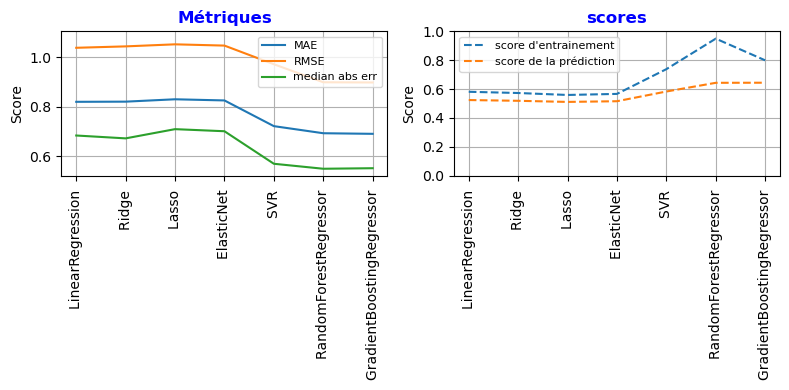

In [38]:
print('Variable cible', Y_CO2_log.columns[0])
DF_score_CO2_log , Param_model_CO2_log, DF_test_pred_CO2_log = algo_predict(modele_grid,Data, 'log_TotalGHGEmissions',
                                                                         Cols_CO2_best_num_log ,Cols_CO2_best_cat_log)
display(DF_score_CO2_log,Param_model_CO2_log)
plot_score(DF_score_CO2_log , 'modèle de régression' ,Score_cols)

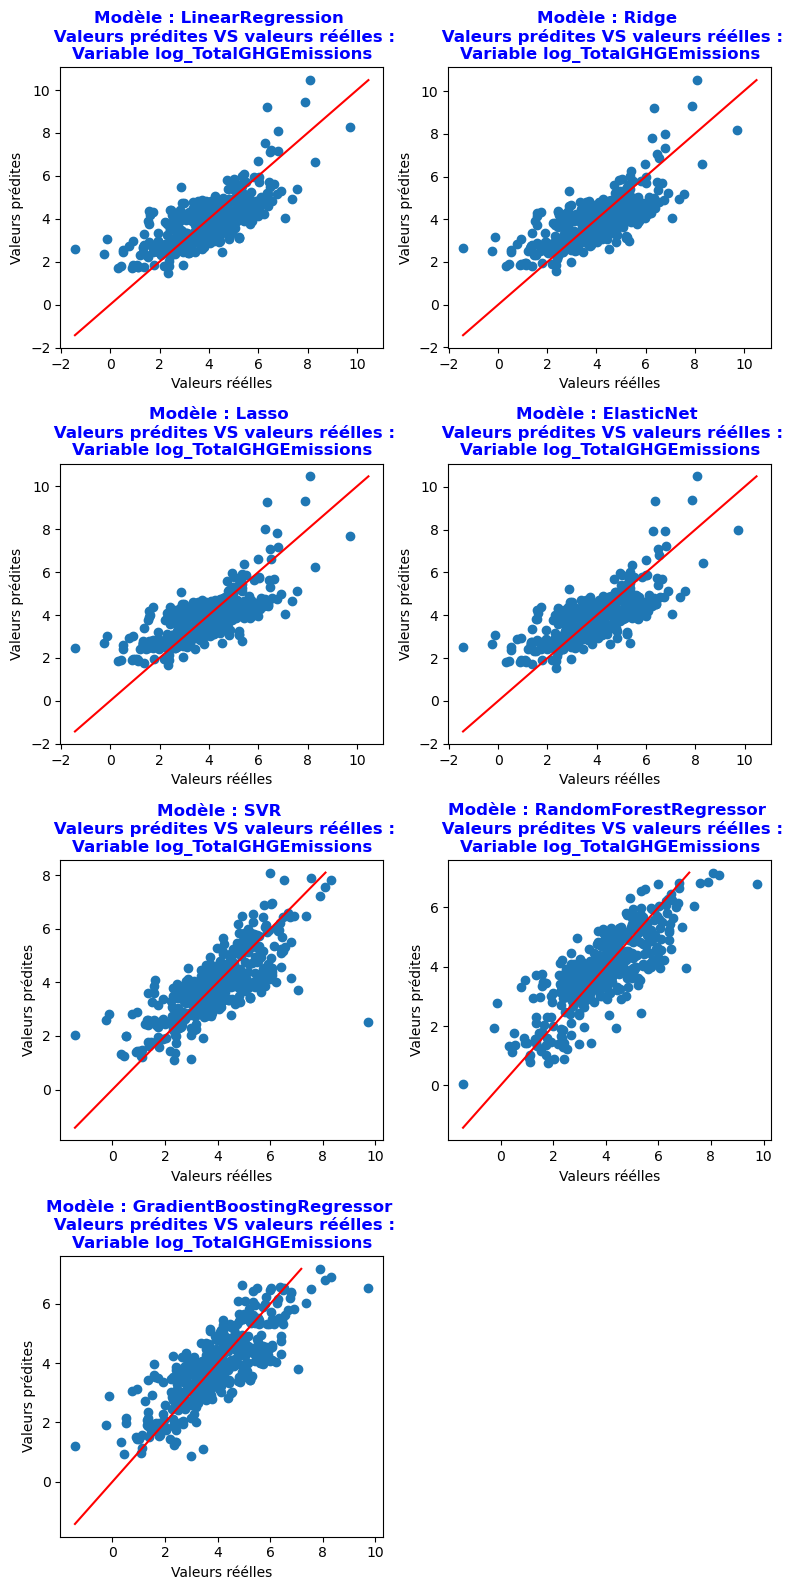

In [39]:
plot_true_pred(DF_test_pred_CO2_log)

Variable cible TotalGHGEmissions
Algorithme:  LinearRegression()
le paramètre optimal est {} avec un score de 0.44
Algorithme:  Ridge()
le paramètre optimal est {'alpha': 4.037017258596558, 'tol': 0.1} avec un score de 0.46
Algorithme:  Lasso()
le paramètre optimal est {'alpha': 4.037017258596558, 'tol': 0.1} avec un score de 0.46
Algorithme:  ElasticNet()
le paramètre optimal est {'alpha': 0.008697490026177835, 'tol': 0.1} avec un score de 0.46
Algorithme:  SVR()
le paramètre optimal est {'C': 50, 'epsilon': 10, 'gamma': 0.0001, 'kernel': 'linear'} avec un score de 0.24
Algorithme:  RandomForestRegressor()
le paramètre optimal est {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 50} avec un score de 0.65
Algorithme:  GradientBoostingRegressor()
le paramètre optimal est {'max_depth': 3, 'n_estimators': 50} avec un score de 0.69


,Variable prédite,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,TotalGHGEmissions,LinearRegression,0.562179,0.162119,195.706756,806.983541,89.311456
1,TotalGHGEmissions,Ridge,0.550224,0.185366,195.707917,795.710277,89.377393
2,TotalGHGEmissions,Lasso,0.538179,0.180253,178.871834,798.203575,71.798949
3,TotalGHGEmissions,ElasticNet,0.546187,0.188212,195.369731,794.319128,88.077104
4,TotalGHGEmissions,SVR,0.234702,0.086120,130.006105,842.787723,29.279652
5,TotalGHGEmissions,RandomForestRegressor,0.945928,0.228659,134.432972,774.277687,47.625021
6,TotalGHGEmissions,GradientBoostingRegressor,0.937666,0.240334,137.384412,768.395894,43.140713


,modèle de régression,Paramètre du modèle
0,LinearRegression,{}
1,Ridge,"{'alpha': 4.037017258596558, 'tol': 0.1}"
2,Lasso,"{'alpha': 4.037017258596558, 'tol': 0.1}"
3,ElasticNet,"{'alpha': 0.008697490026177835, 'tol': 0.1}"
4,SVR,"{'C': 50, 'epsilon': 10, 'gamma': 0.0001, 'kernel': 'linear'}"
5,RandomForestRegressor,"{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 50}"
6,GradientBoostingRegressor,"{'max_depth': 3, 'n_estimators': 50}"


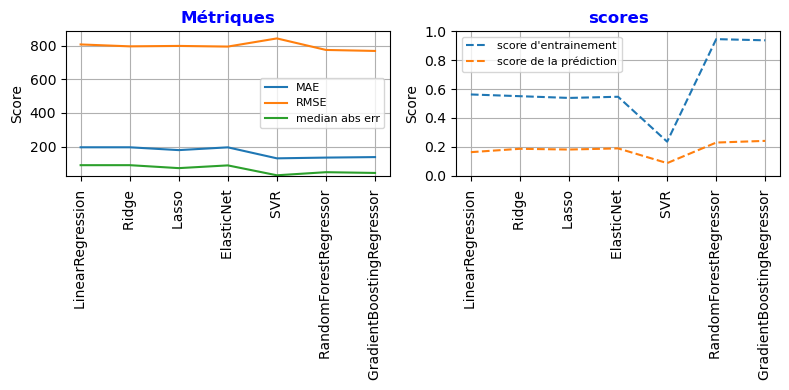

In [40]:
print('Variable cible', Y_CO2.columns[0])
DF_score_CO2 , Param_model_CO2, DF_test_pred_CO2 = algo_predict(modele_grid,Data, 'TotalGHGEmissions',
                                                                         Cols_CO2_best_num ,Cols_CO2_best_cat)
display(DF_score_CO2,Param_model_CO2)
plot_score(DF_score_CO2 , 'modèle de régression' ,Score_cols)

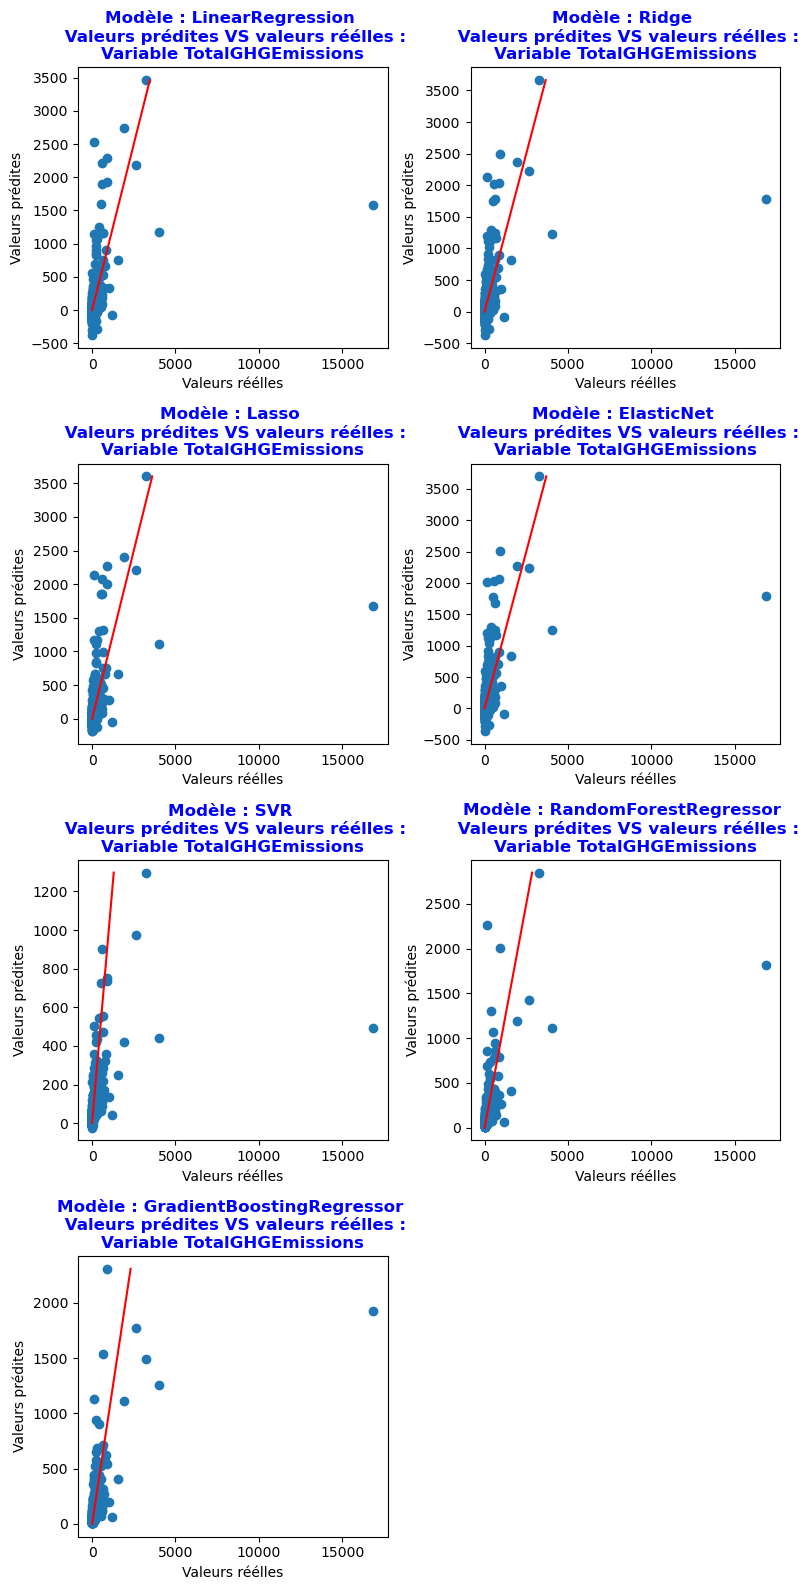

In [41]:
plot_true_pred(DF_test_pred_CO2)

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Nous observons également que la mise echelle logarithmique de la variable cible <span STYLE="color:gray;" ><i> TotalGHGEmissions </i></span> permet d'obtenir de meilleurs performances pour la prédiction des émissions de CO2 des bâtiments</b> 

## <a STYLE="color:black" id="3.3">3.3 Influence du score ENERGY STAR pour la prédiction d’émission CO2</a> 
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Le score ENERGY STAR fournit un aperçu complet du rendement énergétique de votre bâtiment, en tenant compte des actifs physiques, des opérations et du comportement des occupants du bâtiment. Il est exprimé sur une échelle de 1 à 100, où plus le score est élevé, meilleure est la performance énergétique du bâtiment.<b></p>

## <a STYLE="padding-left:1em;color:black" id="3.3.1">3.3.1 Préparation du jeu de donnée</a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BuildingType                      1683 non-null   object 
 1   Neighborhood                      1683 non-null   object 
 2   NumberofFloors                    1683 non-null   float64
 3   LargestPropertyUseTypeGFA         1683 non-null   float64
 4   SecondLargestPropertyUseTypeGFA   1683 non-null   float64
 5   ThirdLargestPropertyUseTypeGFA    1683 non-null   float64
 6   ENERGYSTARScore                   1148 non-null   float64
 7   SiteEnergyUse(kBtu)               1683 non-null   float64
 8   TotalGHGEmissions                 1683 non-null   float64
 9   ElectricityUse                    1683 non-null   object 
 10  NaturalGasUse                     1683 non-null   object 
 11  SteamUseUse                       1683 non-null   object 
 12  Buildi

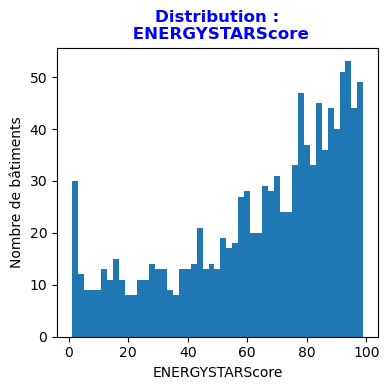

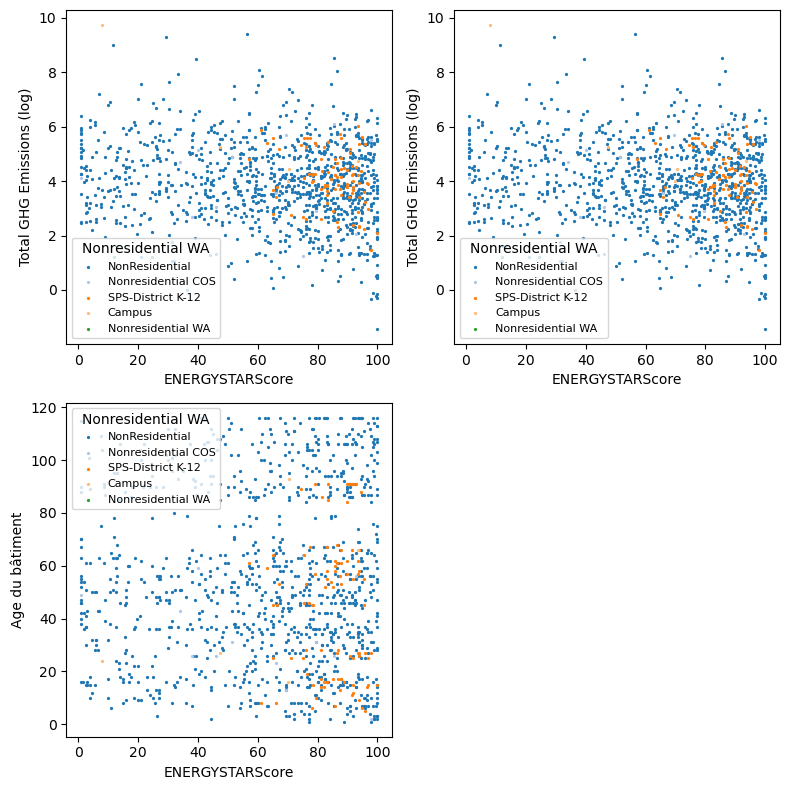

In [42]:
Data_Estar = Data.copy()
Data_Estar.info()
plot_hist(Data_Estar,['ENERGYSTARScore'],Nb_cols = 1 , y_name = 'Nombre de bâtiments')
plot_scatter(Data,'ENERGYSTARScore',['log_TotalGHGEmissions','log_TotalGHGEmissions','BuildingAge'],categorie='BuildingType')

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Nous observons que le score ENERGY STAR ne semble pas avoir de corrélation importante avec les émissions de CO2. De plus, La distribution ne suit pas de loi normale, ne permettant pas de completer les valeurs manquantes par la moyenne sans affecter le jeu de donnée. Pour pourvoir utiliser cette variable pour la prédiction des émissions, il est necessaire de supprimer les bâtiments n'ayant pas de données renseignées. </b> 

In [43]:
Data_Estar = Data_Estar.dropna()
Data_Estar.reset_index(drop=True,inplace=True)

## <a STYLE="padding-left:1em;color:black" id="3.3.2">3.3.2 Transformation des variables catégorielles et numériques pertinentes</a>

In [44]:
X_Estar = pd.DataFrame(Data_Estar['ENERGYSTARScore'])
Scaler=MinMaxScaler()
X_Estar = pd.DataFrame(Scaler.fit_transform(X_Estar), columns = ['ENERGYSTARScore'])
Y_CO2_Estar_log = pd.DataFrame(Data_Estar['log_TotalGHGEmissions'])
Y_CO2_Estar = pd.DataFrame(Data_Estar['TotalGHGEmissions'])

In [45]:
Data_Estar_std = select_col_pred(Data_Estar,Y_CO2_Estar_log.columns,seuil = 0, cols_num = Cols_CO2_best_num_log ,cols_cat = Cols_CO2_best_cat_log)
Data_Estar_final = pd.concat([X_Estar,Data_Estar_std],axis = 1) 
Data_Estar_final_log = pd.concat([Y_CO2_Estar_log,Data_Estar_final],axis = 1)

## <a STYLE="padding-left:1em;color:black" id="3.3.3">3.3.3 Régression linéaire multivariée régularisée, vectorielle et ensemblistes</a>

Variable cible : log_TotalGHGEmissions
Algorithme:  LinearRegression()
le paramètre optimal est {} avec un score de 0.62
Algorithme:  Ridge()
le paramètre optimal est {'alpha': 8.497534359086455, 'tol': 0.1} avec un score de 0.62
Algorithme:  Lasso()
le paramètre optimal est {'alpha': 0.010476157527896652, 'tol': 0.001} avec un score de 0.63
Algorithme:  ElasticNet()
le paramètre optimal est {'alpha': 0.012618568830660211, 'tol': 0.01} avec un score de 0.63
Algorithme:  SVR()
le paramètre optimal est {'C': 50, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} avec un score de 0.77
Algorithme:  RandomForestRegressor()
le paramètre optimal est {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 300} avec un score de 0.77
Algorithme:  GradientBoostingRegressor()
le paramètre optimal est {'max_depth': 3, 'n_estimators': 100} avec un score de 0.79


,Variable prédite,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,log_TotalGHGEmissions,LinearRegression,0.671408,0.622580,0.663791,0.827198,0.607756
1,log_TotalGHGEmissions,Ridge,0.663030,0.591410,0.675122,0.860678,0.582811
2,log_TotalGHGEmissions,Lasso,0.654294,0.581560,0.676901,0.870990,0.582542
3,log_TotalGHGEmissions,ElasticNet,0.655497,0.582838,0.675391,0.869659,0.579833
4,log_TotalGHGEmissions,SVR,0.843159,0.654430,0.529067,0.791525,0.423509
5,log_TotalGHGEmissions,RandomForestRegressor,0.968182,0.700672,0.545736,0.736665,0.447940
6,log_TotalGHGEmissions,GradientBoostingRegressor,0.901543,0.739390,0.524443,0.687372,0.402951


,modèle de régression,Paramètre du modèle
0,LinearRegression,{}
1,Ridge,"{'alpha': 8.497534359086455, 'tol': 0.1}"
2,Lasso,"{'alpha': 0.010476157527896652, 'tol': 0.001}"
3,ElasticNet,"{'alpha': 0.012618568830660211, 'tol': 0.01}"
4,SVR,"{'C': 50, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}"
5,RandomForestRegressor,"{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 300}"
6,GradientBoostingRegressor,"{'max_depth': 3, 'n_estimators': 100}"


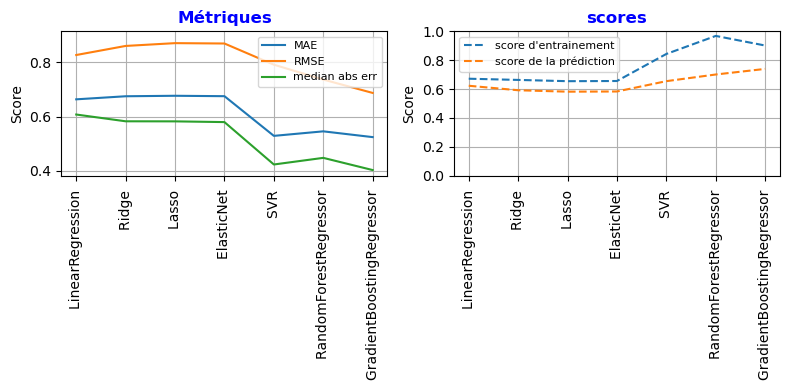

In [46]:
print('Variable cible : log_TotalGHGEmissions')
Estar_Score_CO2_log,Estar_Param_model_CO2_log,DF_test_pred_Estar_CO2_log = algo_predict(modele_grid,Data_Estar_final_log,'log_TotalGHGEmissions')
display(Estar_Score_CO2_log,Estar_Param_model_CO2_log)
plot_score(Estar_Score_CO2_log , 'modèle de régression' ,Score_cols)

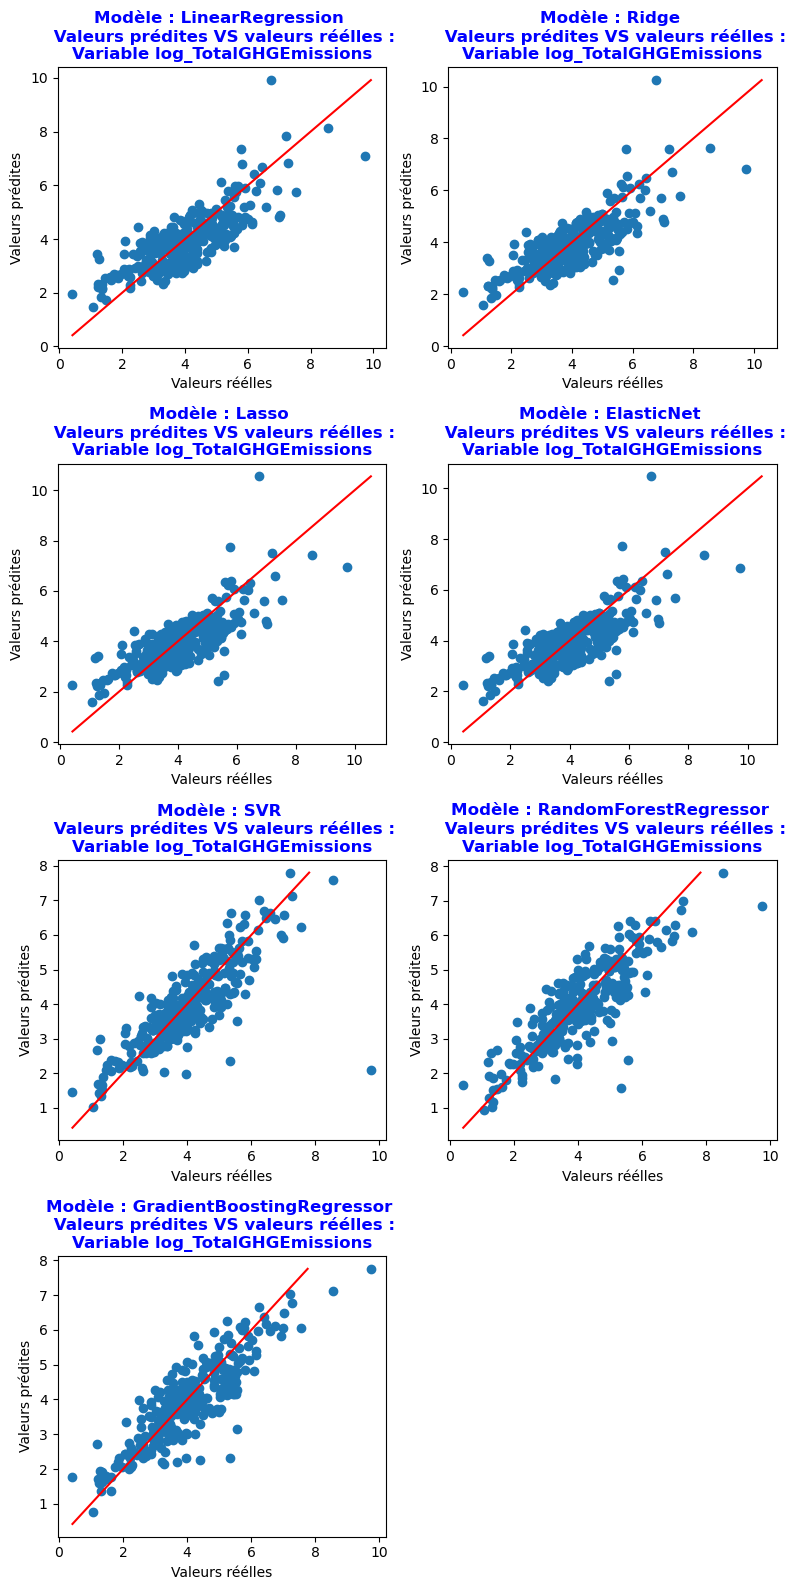

In [47]:
plot_true_pred(DF_test_pred_Estar_CO2_log)

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Nous observons que l'ajout du score ENERGY STAR améliore les metriques des différents modèles de prédictions. Néanmoins, cette amélioration peut être dû à la diminution de de plus de 30% du jeu de donnée du fait que la variable <span STYLE="color:gray;" ><i> ENERGYSTARScore </i></span> soit peu renseignée. Pour vérifier cela, nous allons a nouveau tester les modèles prédictifs en enlevant la variable <span STYLE="color:gray;" ><i> ENERGYSTARScore </i></span>

Variable cible : log_TotalGHGEmissions
Algorithme:  LinearRegression()
le paramètre optimal est {} avec un score de 0.55
Algorithme:  Ridge()
le paramètre optimal est {'alpha': 12.328467394420684, 'tol': 0.1} avec un score de 0.56
Algorithme:  Lasso()
le paramètre optimal est {'alpha': 0.012618568830660211, 'tol': 0.001} avec un score de 0.57
Algorithme:  ElasticNet()
le paramètre optimal est {'alpha': 0.018307382802953697, 'tol': 0.01} avec un score de 0.57
Algorithme:  SVR()
le paramètre optimal est {'C': 50, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} avec un score de 0.70
Algorithme:  RandomForestRegressor()
le paramètre optimal est {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300} avec un score de 0.72
Algorithme:  GradientBoostingRegressor()
le paramètre optimal est {'max_depth': 5, 'n_estimators': 50} avec un score de 0.72


,Variable prédite,modèle de régression,score d'entrainement,score de la prédiction,MAE,RMSE,median abs err
0,log_TotalGHGEmissions,LinearRegression,0.609686,0.562726,0.697338,0.890377,0.575933
1,log_TotalGHGEmissions,Ridge,0.599520,0.536907,0.706704,0.916286,0.564196
2,log_TotalGHGEmissions,Lasso,0.588540,0.529858,0.707445,0.923233,0.558611
3,log_TotalGHGEmissions,ElasticNet,0.589097,0.529438,0.706885,0.923646,0.567274
4,log_TotalGHGEmissions,SVR,0.773669,0.618764,0.587574,0.831369,0.467027
5,log_TotalGHGEmissions,RandomForestRegressor,0.927957,0.674614,0.575191,0.768062,0.445557
6,log_TotalGHGEmissions,GradientBoostingRegressor,0.894492,0.684023,0.581952,0.756876,0.460828


,modèle de régression,Paramètre du modèle
0,LinearRegression,{}
1,Ridge,"{'alpha': 12.328467394420684, 'tol': 0.1}"
2,Lasso,"{'alpha': 0.012618568830660211, 'tol': 0.001}"
3,ElasticNet,"{'alpha': 0.018307382802953697, 'tol': 0.01}"
4,SVR,"{'C': 50, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}"
5,RandomForestRegressor,"{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}"
6,GradientBoostingRegressor,"{'max_depth': 5, 'n_estimators': 50}"


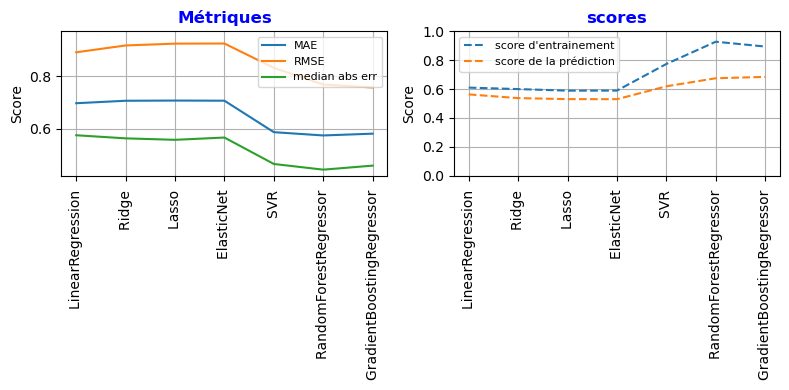

In [48]:
Data_sans_Estar_final_log = Data_Estar_final_log.drop('ENERGYSTARScore',axis = 1 , errors='ignore')
print('Variable cible : log_TotalGHGEmissions')
sans_Estar_Score_CO2_log,sans_Estar_Param_model_CO2_log,DF_test_pred_sans_Estar_CO2_log = algo_predict(modele_grid,Data_sans_Estar_final_log,'log_TotalGHGEmissions')
display(sans_Estar_Score_CO2_log,sans_Estar_Param_model_CO2_log)
plot_score(sans_Estar_Score_CO2_log , 'modèle de régression' ,Score_cols)

<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Nous observons que la réduction du nombre de donnée améliore les prédictions et cette amélioration est accentuée par l'ajout de la variable <span STYLE="color:gray;" ><i> ENERGYSTARScore </i></span>